In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Carga y limpieza de datos

In [ ]:
# Leemos y cargamos la base
file_path = '/content/MBA.csv'
bd = pd.read_csv(file_path)

In [ ]:
#eliminamos la columna aplication_id
bd = bd.drop(columns=['application_id'])
bd

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...
6189,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [ ]:
#eliminamos las filas con admission 'Waitlist'
bd = bd[bd.admission != 'Waitlist']
bd
#recalculas los identificadores
bd = bd.reset_index(drop=True)
bd

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...
6089,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6090,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6091,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6092,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [ ]:
# Cambiamos admission NaN por Reject
bd['admission'] = bd['admission'].fillna('Reject')
bd

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Reject
2,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Reject
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Reject
...,...,...,...,...,...,...,...,...,...
6089,Male,False,3.49,Business,White,640.0,5.0,Other,Reject
6090,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,Reject
6091,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6092,Male,True,3.36,Business,NaN,590.0,5.0,Other,Reject


In [ ]:
# Contar la ocurrencia de cada género
gender_counts = bd['gender'].value_counts()
print("Gender Counts:\n", gender_counts)

# Contar la ocurrencia de cada raza
race_counts = bd['race'].value_counts()
print("\nRace Counts:\n", race_counts)

admission_counts = bd['admission'].value_counts()
print("\nAdmission Counts:\n", admission_counts)

Gender Counts:
 gender
Male      3893
Female    2201
Name: count, dtype: int64

Race Counts:
 race
White       1430
Asian       1125
Black        906
Hispanic     588
Other        233
Name: count, dtype: int64

Admission Counts:
 admission
Reject    5194
Admit      900
Name: count, dtype: int64


In [ ]:
# Calcular los porcentajes
gender_percentages = (bd['gender'].value_counts(normalize=True) * 100).round(2)
print("Gender Percentages:\n", gender_percentages)

race_percentages = (bd['race'].value_counts(normalize=True) * 100).round(2)
print("\nRace Percentages:\n", race_percentages)

admission_percentages = (bd['admission'].value_counts(normalize=True) * 100).round(2)
print("\nAdmission Percentages:\n", admission_percentages)

Gender Percentages:
 gender
Male      63.88
Female    36.12
Name: proportion, dtype: float64

Race Percentages:
 race
White       33.40
Asian       26.27
Black       21.16
Hispanic    13.73
Other        5.44
Name: proportion, dtype: float64

Admission Percentages:
 admission
Reject    85.23
Admit     14.77
Name: proportion, dtype: float64


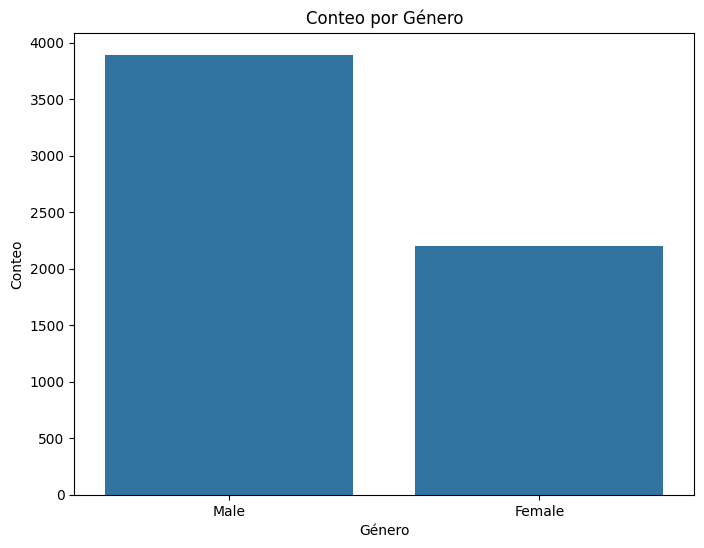

In [ ]:
# Contar la ocurrencia de cada género
gender_counts = bd['gender'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel("Género")
plt.ylabel("Conteo")
plt.title("Conteo por Género")
plt.show()

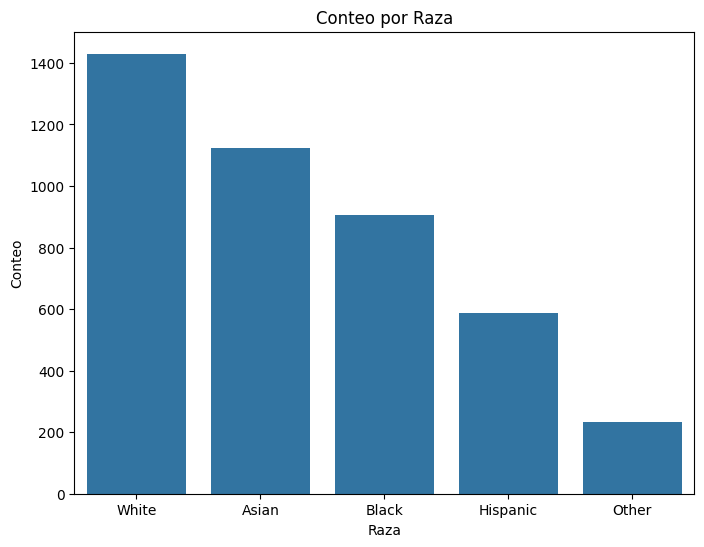

In [ ]:
# Contar la ocurrencia de cada raza
race_counts = bd['race'].value_counts(dropna=False)

# Crear el gráfico de barra
plt.figure(figsize=(8, 6))
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.xlabel("Raza")
plt.ylabel("Conteo")
plt.title("Conteo por Raza")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Suponemos que `bd` es tu DataFrame.
# Lista de columnas categóricas
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']

# Diccionario para almacenar las asociaciones de cada columna
label_encoders = {}  # Almacena los LabelEncoders para posibles usos posteriores
dictionaries = {}    # Diccionario con los mapeos numéricos a valores originales

for col in categorical_cols:
    label_encoder = LabelEncoder()
    # Ajusta y transforma la columna
    bd[col] = label_encoder.fit_transform(bd[col])

    # Guarda el LabelEncoder
    label_encoders[col] = label_encoder

    # Genera un diccionario con el mapeo transformado (llaves) a valores originales
    dictionaries[col] = {idx: label for idx, label in enumerate(label_encoder.classes_)}

    # Mostrar el diccionario generado
    print(f'Diccionario para {col}: {dictionaries[col]}')

bd['admission'] = np.array([1 if label == 'Admit' else 0 for label in bd['admission']])
dictionaries['admission'] = {'Admit': 1, 'Reject': 0}
bd

Diccionario para gender: {0: 'Female', 1: 'Male'}
Diccionario para international: {0: False, 1: True}
Diccionario para major: {0: 'Business', 1: 'Humanities', 2: 'STEM'}
Diccionario para race: {0: 'Asian', 1: 'Black', 2: 'Hispanic', 3: 'Other', 4: 'White', 5: nan}
Diccionario para work_industry: {0: 'CPG', 1: 'Consulting', 2: 'Energy', 3: 'Financial Services', 4: 'Health Care', 5: 'Investment Banking', 6: 'Investment Management', 7: 'Media/Entertainment', 8: 'Nonprofit/Gov', 9: 'Other', 10: 'PE/VC', 11: 'Real Estate', 12: 'Retail', 13: 'Technology'}


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,1
1,1,0,3.28,1,1,680.0,5.0,6,0
2,0,1,3.30,0,5,710.0,5.0,13,1
3,1,0,3.47,2,1,690.0,6.0,13,0
4,1,0,3.35,2,2,590.0,5.0,1,0
...,...,...,...,...,...,...,...,...,...
6089,1,0,3.49,0,4,640.0,5.0,9,0
6090,1,0,3.18,2,1,670.0,4.0,1,0
6091,0,1,3.22,0,5,680.0,5.0,4,1
6092,1,1,3.36,0,5,590.0,5.0,9,0


In [ ]:
#normalizamos los datos númericos
# Crear el escalador
scaler = MinMaxScaler()

# Escalar las columnas seleccionadas
columns_to_scale = ['gpa', 'gmat', 'work_exp']
bd[columns_to_scale] = scaler.fit_transform(bd[columns_to_scale])
bd

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,0.580357,0,0,0.238095,0.250,3,1
1,1,0,0.562500,1,1,0.523810,0.500,6,0
2,0,1,0.580357,0,5,0.666667,0.500,13,1
3,1,0,0.732143,2,1,0.571429,0.625,13,0
4,1,0,0.625000,2,2,0.095238,0.500,1,0
...,...,...,...,...,...,...,...,...,...
6089,1,0,0.750000,0,4,0.333333,0.500,9,0
6090,1,0,0.473214,2,1,0.476190,0.375,1,0
6091,0,1,0.508929,0,5,0.523810,0.500,4,1
6092,1,1,0.633929,0,5,0.095238,0.500,9,0


In [ ]:
# Separamos la base de datos en variables independiente y dependietes
# Separar características (X) y objetivo (y)
X = bd.drop(columns=['admission'])  # Asegúrate de que 'admission' sea tu variable objetivo
y = bd['admission']
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Codificar las etiquetas
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train = pd.Series(y_train)
y_train.reset_index(drop=True, inplace=True)
y_test = pd.Series(y_test)
y_test.reset_index(drop=True, inplace=True)

## Árbol de decisión

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    verbose=1
)
# Entrenar con los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el F1-score asociado
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best F1 Score: 0.8169971593261429


In [ ]:
from sklearn.metrics import classification_report, f1_score

# Predecir en el conjunto de prueba
best_model_dt = grid_search.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)

# Calcular F1-score y reporte de clasificación
print("F1 Score (Test):", f1_score(y_test, y_pred_dt, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

F1 Score (Test): 0.8348764178761507

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1055
           1       0.40      0.27      0.32       164

    accuracy                           0.85      1219
   macro avg       0.65      0.60      0.62      1219
weighted avg       0.83      0.85      0.83      1219



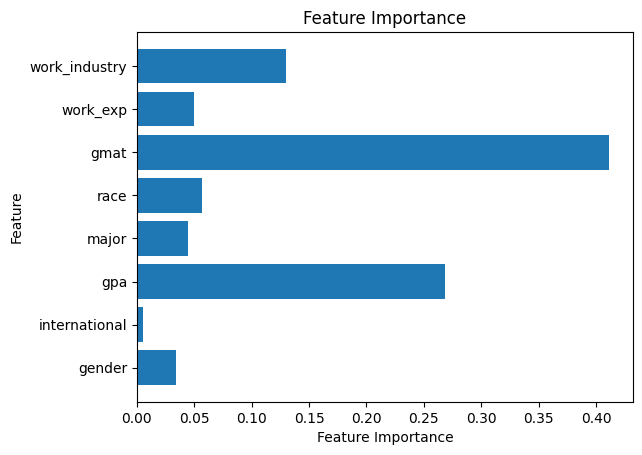

In [ ]:
# Importancia de features del árbol de decisón
feature_importances = best_model_dt.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Definir la rejilla de hiperparámetros optimizada
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [3, 5, 10, None],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras necesarias en una hoja
    'max_features': ['sqrt', 'log2'],  # Número de características a considerar al buscar la mejor división
    'bootstrap': [True, False]  # Método para seleccionar muestras para entrenar cada árbol
}

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,  # Limitar el número de combinaciones a probar
    cv=5,  # Validación cruzada con 5 pliegues
    scoring='f1_weighted',  # Métrica de evaluación
    verbose=1,
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42  # Para reproducibilidad
)

# Entrenar el modelo con los datos de entrenamiento
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor F1-score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# Usar el mejor modelo encontrado para hacer predicciones
best_rf_model = random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluar el modelo con el conjunto de prueba
print("\nExactitud en el conjunto de prueba:", accuracy_score(y_test, y_pred_rf))
print("\nF1-score: ", f1_score(y_test, y_pred_rf, average='weighted'))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best F1 Score: 0.8168161080146753

Exactitud en el conjunto de prueba: 0.8498769483182936

F1-score:  0.8302019904319873

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1055
           1       0.39      0.21      0.28       164

    accuracy                           0.85      1219
   macro avg       0.64      0.58      0.60      1219
weighted avg       0.82      0.85      0.83      1219



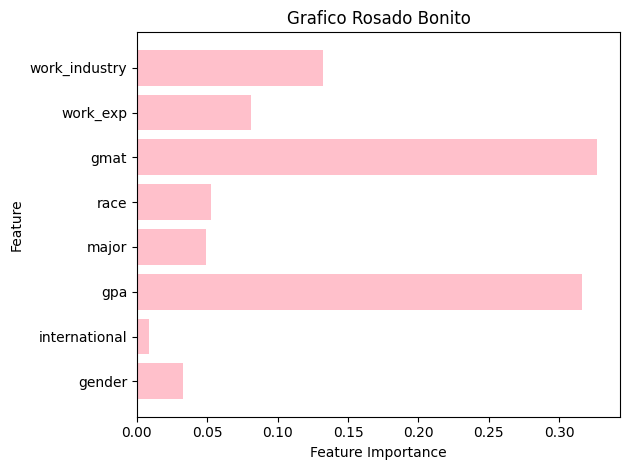

In [ ]:
# Obtener las importancias de las características del mejor modelo
feature_importances = best_rf_model.feature_importances_

# Crear un gráfico de barras horizontal
plt.barh(X.columns, feature_importances, color='pink')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Grafico Rosado Bonito")
plt.tight_layout()
plt.show()

### Calculo de ROC y Threshold

[0.105      0.08583333 0.3525     ... 0.         0.         0.        ]
AUC: 0.83


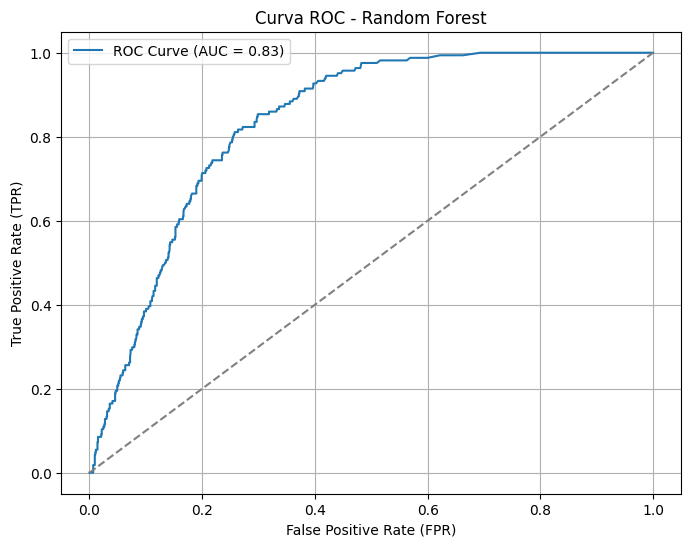

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener las probabilidades predichas para la clase positiva
y_prob = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
print(y_prob)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea diagonal para referencia
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Crear una lista de posibles thresholds
thresholds = np.arange(0.0, 1.1, 0.1)

# Calcular el F1-score para cada threshold
f1_scores = [f1_score(y_test, (y_prob >= t).astype(int), average='weighted') for t in thresholds]

# Encontrar el threshold óptimo
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Threshold óptimo basado en F1-score: {optimal_threshold}")

Threshold óptimo basado en F1-score: 0.4


In [ ]:
from sklearn.metrics import roc_curve

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Encontrar el índice del punto más cercano a la esquina superior izquierda
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Threshold óptimo basado en ROC: {optimal_threshold}")

Threshold óptimo basado en ROC: 0.11583333333333334


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

# Primero se buscan los mejores parámetros para este clasificador

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_weighted', # Usamos f1 score
                           verbose=1)

# Entrenar
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el F1-score asociado
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


best_knn = grid_search.best_estimator_
predictions = best_knn.predict(X_test)
print("----------------")
print("Resultados para clasificador: k-Nearest Neighbors")
print("F1 Score (Test):", f1_score(y_test, predictions, average='weighted'))
print(classification_report(y_test,predictions))
print("----------------\n\n")

Fitting 5 folds for each of 30 candidates, totalling 150 fits


### Cálculo de métricas de sesgo

#### Independencia

In [ ]:
# Calculo de la independencia
# Agrupar datos sensibles
sensitive_attributes = ['gender', 'race']

# Obtener predicciones del modelo
y_pred = best_rf_model.predict(X_test)

def calculate_ppr(df, attribute, y_pred):
    """Calcular la Tasa de Positivos Predichos (PPR) para cada grupo"""
    results = {}
    for group in df[attribute].unique():
        group_indices = df[df[attribute] == group].index
        group_ppr = sum(y_pred[group_indices] == 1) / len(group_indices)
        results[dictionaries[attribute][group]] = group_ppr
    return results

# Calcular PPR para género y raza
ppr_gender_ind = calculate_ppr(X_test, 'gender', y_pred)
ppr_race_ind = calculate_ppr(X_test, 'race', y_pred)

print("PPR por Género:", ppr_gender_ind)
print("PPR por Raza:", ppr_race_ind)

In [ ]:
labels = [str(key) if key == key else 'nan' for key in ppr_race_ind.keys()]  # Manejo especial para 'nan'
# Visualizar PPR por género
plt.bar(ppr_gender_ind.keys(), ppr_gender_ind.values())
plt.title("Tasa de Positivos Predichos por Género")
plt.ylabel("PPR")
plt.xlabel("Género")
plt.show()

# Visualizar PPR por raza
plt.bar(labels, ppr_race_ind.values())
plt.title("Tasa de Positivos Predichos por Raza")
plt.ylabel("PPR")
plt.xlabel("Raza")
plt.show()


### Interpretación:
* DPD = 0 o DPR = 1: Indica independencia perfecta entre el atributo sensible y la decisión.
* Valores altos de DPD o bajos de DPR indican que el modelo trata de forma diferente a los grupos.

In [ ]:
def demographic_parity_difference(ppr_dict):
    values = list(ppr_dict.values())
    return max(values) - min(values)

dpd_gender = demographic_parity_difference(ppr_gender_ind)
dpd_race = demographic_parity_difference(ppr_race_ind)

print("Diferencia de Paridad Demográfica (Género):", dpd_gender)
print("Diferencia de Paridad Demográfica (Raza):", dpd_race)

In [ ]:
def demographic_parity_ratio(ppr_dict):
    values = list(ppr_dict.values())
    return min(values) / max(values)

dpr_gender = demographic_parity_ratio(ppr_gender_ind)
dpr_race = demographic_parity_ratio(ppr_race_ind)

print("Razón de Paridad Demográfica (Género):", dpr_gender)
print("Razón de Paridad Demográfica (Raza):", dpr_race)

In [ ]:
# Grafico para visualizar DPD y DPR
plt.bar(['Género', 'Raza'], [dpd_gender, dpd_race])
plt.title("Diferencia de Paridad Demográfica")
plt.ylabel("Valor")
plt.show()

plt.bar(['Género', 'Raza'], [dpr_gender, dpr_race])
plt.title("Razón de Paridad Demográfica")
plt.ylabel("Valor")
plt.show()


A partir de los resultados podemos ver que el modelo no es independiente, pero tampoco tiene altos grados de dependencia en los atributos sensibles.

#### Separación

In [ ]:
# La separación se trata en evaluar si las tasas de TPR y FPR son similares entre grupos demográficos.
# Si alguno de ellos varía mucho entre grupos, se tendría "sesgo bajo separación"

from sklearn.metrics import confusion_matrix

# Función que calcula TPR y FPR (extraida de tutorial Fairness)
def calculate_tpr_fpr(conf_matrix):
    """
    Calculate TPR (True Positive Rate) and FPR (False Positive Rate) from the confusion matrix.
    """
    tn, fp, fn, tp = conf_matrix.ravel()  # unpack confusion matrix
    tpr = tp / (tp + fn)  # True Positive Rate: TP / (TP + FN)
    fpr = fp / (fp + tn)  # False Positive Rate: FP / (FP + TN)
    return tpr, fpr

# Separamos entre grupos

# Esta función entrega diccionarios con los tpr rates, fpr rates e índice de Youden que se visualizan con las predicciones actuales del modelo
# El índice de Youden entrega la diferencia entre TPR y FPR para cada grupo.
def equalized_odds(df, sensitive_col, label_col, score_col):

    # Se tendrán diccionarios que guarden los valores
    tpr_rates = {}
    fpr_rates = {}
    youden_rates = {}

    # se verá para cada grupo demográfico
    for idx, sensitive_value in enumerate(df[sensitive_col].unique()):
        group_indices = df[df[sensitive_col] == sensitive_value].index
        group_df = df[df[sensitive_col] == sensitive_value]

        y_true_group = label_col[group_indices]
        y_scores = group_df[score_col]

        # Predecir usando el threshold generalizado
        # esto no sé si es necesario, pues podría significar estar aplicando mitigación
        #y_pred_group = (y_scores >= group_threshold).astype(int)
        y_pred_group = y_pred[group_indices]

        # Calculate confusion matrix for the group
        #conf_matrix_group = confusion_matrix(y_true_group, y_pred_group)

        # Para cada uno se deben calcular las métricas TPR y FPR
        conf_matrix = confusion_matrix(y_true_group, y_pred_group)
        tpr, fpr = calculate_tpr_fpr(conf_matrix)

        tpr_rates[sensitive_value] = tpr
        fpr_rates[sensitive_value] = fpr
        youden_group = tpr - fpr
        youden_rates[sensitive_value] = youden_group

    return tpr_rates, fpr_rates, youden_rates

In [ ]:
y_prob = best_rf_model.predict_proba(X_test)[:, 1]
X_test['score'] = y_prob

In [ ]:
tpr_dict1, fpr_dict1, youden_dict1 = equalized_odds(X_test, sensitive_col='race', label_col=y_test, score_col='score')

# Visualizar los resultados
for group, tpr in tpr_dict1.items():
    print(f"Grupo: {dictionaries['race'][group]}, TPR: {tpr:.2f}, FPR: {fpr_dict1[group]:.2f}, índice Youden: {youden_dict1[group]:.2f}")

In [ ]:
def plot_tpr_fpr(tpr_dict, fpr_dict, youden_dict, sensitive_col):
    """
    Grafica los TPR y FPR por grupo sensible en gráficos de barras separados.
    """
    groups = list(tpr_dict.keys())
    names = []
    for name in groups:
      names.append(dictionaries[sensitive_col][name])
    tpr_values = list(tpr_dict.values())
    fpr_values = list(fpr_dict.values())
    youden_values = list(youden_dict.values())

    x = np.arange(len(groups))  # Índices para los grupos

    # Crear dos gráficos de barras separados
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Gráfico de TPR
    axes[0].bar(x, tpr_values, color='b', alpha=0.7)
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(names)
    axes[0].set_ylim(0, 0.4)
    axes[0].set_title('True Positive Rate (TPR) por grupo')
    axes[0].set_ylabel('TPR')
    axes[0].set_xlabel('Grupos sensibles')

    # Gráfico de FPR
    axes[1].bar(x, fpr_values, color='r', alpha=0.7)
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(names)
    axes[1].set_ylim(0, 0.4)
    axes[1].set_title('False Positive Rate (FPR) por grupo')
    axes[1].set_ylabel('FPR')
    axes[1].set_xlabel('Grupos sensibles')

    # Gráfico de Youden Index
    axes[2].bar(x, youden_values, color='g', alpha=0.7)
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(names)
    axes[2].set_ylim(0, 0.4)
    axes[2].set_title('índice de Youden por grupo')
    axes[2].set_ylabel('Youden Index')
    axes[2].set_xlabel('Grupos sensibles')

    # Ajustar diseño
    plt.tight_layout()
    plt.show()

plot_tpr_fpr(tpr_dict1, fpr_dict1, youden_dict1, 'race')

In [ ]:
def plot_heatmap_tpr_fpr(tpr_dict, fpr_dict, youden_dict):
    """
    Grafica un heatmap que compara TPR,FPR e índice de Youden entre los grupos.
    """
    data = pd.DataFrame({
        "TPR": tpr_dict,
        "FPR": fpr_dict,
        "Youden": youden_dict
    }).T

    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Valor'})
    plt.title('Heatmap de TPR, FPR e índice de Youden por grupo')
    plt.xlabel('Grupos sensibles')
    plt.ylabel('Métricas')
    plt.tight_layout()
    plt.show()

plot_heatmap_tpr_fpr(tpr_dict1, fpr_dict1, youden_dict1)

In [ ]:
# Ahora se va a ver en género

tpr_dict2, fpr_dict2, youden_dict2 = equalized_odds(X_test, sensitive_col='gender', label_col=y_test, score_col='score')

# Visualizar los resultados
for group, tpr in tpr_dict2.items():
    print(f"Grupo: {dictionaries['gender'][group]}, TPR: {tpr:.2f}, FPR: {fpr_dict2[group]:.2f}, índice Youden: {youden_dict2[group]:.2f}")

In [ ]:
# Ahora los gráficos asociados al género
plot_tpr_fpr(tpr_dict2, fpr_dict2, youden_dict2, 'gender')

In [ ]:
plot_heatmap_tpr_fpr(tpr_dict2, fpr_dict2, youden_dict2)

#### Suficiencia

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Calcular True Positives (TP) y False Positives (FP) a partir de la matriz de confusión
def calculate_tp_fp(conf_matrix):
    """
    Calcular True Positives (TP) y False Positives (FP) a partir de la matriz de confusión.
    """
    tn, fp, fn, tp = conf_matrix.ravel()  # unpack confusion matrix
    return tp, fp

def calculate_precision_parity(df, attribute, y_true, y_pred, privileged_values, unprivileged_values):
    """
    Calcular la precisión para los grupos privilegiado y no privilegiado en un atributo sensible.
    """
    results = {}

    # Máscara para los grupos privilegiados
    privileged_mask = df[attribute].isin(privileged_values)
    if sum(privileged_mask) > 0:  # Verificar si hay instancias en el grupo
        tp_privileged, fp_privileged = calculate_tp_fp(confusion_matrix(
            y_true[privileged_mask],
            y_pred[privileged_mask]
        ))
        precision_privileged = tp_privileged / (tp_privileged + fp_privileged) if (tp_privileged + fp_privileged) > 0 else 0
        results['Privileged'] = precision_privileged
    else:
        results['Privileged'] = None  # Manejar el caso sin instancias

    # Máscara para los grupos no privilegiados
    unprivileged_mask = df[attribute].isin(unprivileged_values)
    if sum(unprivileged_mask) > 0:  # Verificar si hay instancias en el grupo
        tp_unprivileged, fp_unprivileged = calculate_tp_fp(confusion_matrix(
            y_true[unprivileged_mask],
            y_pred[unprivileged_mask]
        ))
        precision_unprivileged = tp_unprivileged / (tp_unprivileged + fp_unprivileged) if (tp_unprivileged + fp_unprivileged) > 0 else 0
        results['Unprivileged'] = precision_unprivileged
    else:
        results['Unprivileged'] = None  # Manejar el caso sin instancias

    return results

# Convertir y_test y y_pred a Series para alinearlos con los índices de X_test
y_test = pd.Series(y_test, name='admission').reset_index(drop=True)
y_pred = pd.Series(y_pred, name='prediction').reset_index(drop=True)

# Crear un DataFrame de atributos sensibles basado en X_test
sensitive_df = pd.DataFrame(X_test, columns=['race', 'gender'])

# Calcular precisión para raza
precision_race = calculate_precision_parity(
    df=sensitive_df,
    attribute='race',
    y_true=y_test,
    y_pred=y_pred,
    privileged_values=[4, 0],  # Códigos de los grupos privilegiados para raza
    unprivileged_values=[1, 2, 3]  # Códigos de los grupos no privilegiados para raza
)

# Calcular precisión para género
precision_gender = calculate_precision_parity(
    df=sensitive_df,
    attribute='gender',
    y_true=y_test,
    y_pred=y_pred,
    privileged_values=[1],  # Código del grupo privilegiado para género
    unprivileged_values=[0]  # Código del grupo no privilegiado para género
)

# Imprimir resultados
print("\nPrecisión por Raza:")
print("Grupo Privilegiado (4 y 0):", precision_race['Privileged'])
print("Grupo No Privilegiado (1, 2, 3):", precision_race['Unprivileged'])

print("\nPrecisión por Género:")
print("Grupo Privilegiado (1):", precision_gender['Privileged'])
print("Grupo No Privilegiado (0):", precision_gender['Unprivileged'])



Precisión por Raza:
Grupo Privilegiado (4 y 0): 0.39285714285714285
Grupo No Privilegiado (1, 2, 3): 0.4166666666666667

Precisión por Género:
Grupo Privilegiado (1): 0.2647058823529412
Grupo No Privilegiado (0): 0.4727272727272727


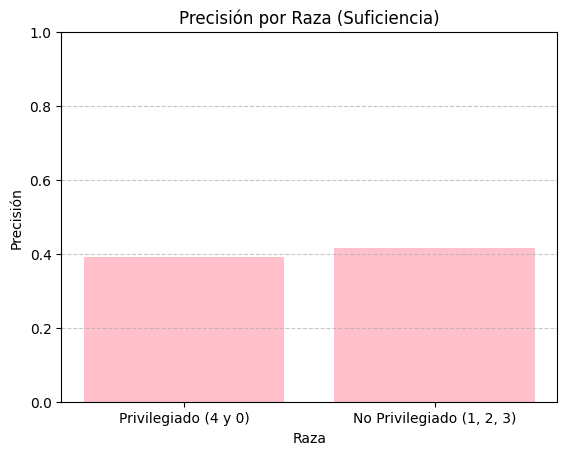

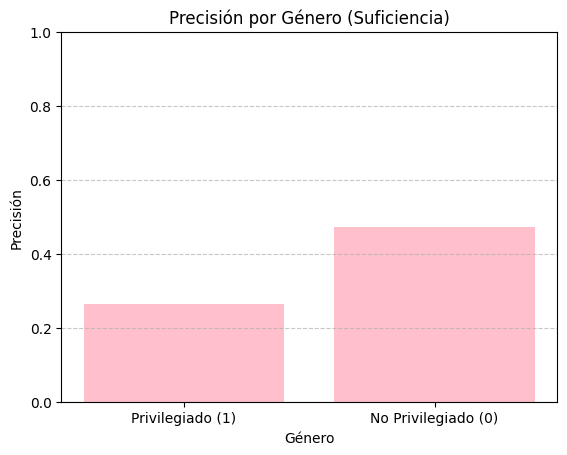

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar la precisión
def plot_precision_bar_chart(metric_dict, title, xlabel, color='pink'):
    """
    Genera un gráfico de barras para la métrica de precisión.
    """
    # Verificar si el diccionario contiene valores válidos
    labels = list(metric_dict.keys())
    values = [v if v is not None else 0 for v in metric_dict.values()]  # Reemplazar None por 0 para graficar

    # Convertir etiquetas para mayor claridad
    if xlabel.lower() == "raza":
        labels = ["Privilegiado (4 y 0)", "No Privilegiado (1, 2, 3)"]
    elif xlabel.lower() == "género":
        labels = ["Privilegiado (1)", "No Privilegiado (0)"]

    plt.bar(labels, values, color=color)
    plt.title(title)
    plt.ylabel("Precisión")
    plt.xlabel(xlabel)
    plt.ylim(0, 1)  # Ajustar límites de eje para proporciones
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Gráfico de precisión por raza
plot_precision_bar_chart(
    precision_race,
    title="Precisión por Raza (Suficiencia)",
    xlabel="Raza"
)

# Gráfico de precisión por género
plot_precision_bar_chart(
    precision_gender,
    title="Precisión por Género (Suficiencia)",
    xlabel="Género"
)


#### Interpretación

In [ ]:
# Función para calcular la Diferencia de Suficiencia
def predictive_parity_difference(precision_dict, attribute):
    """
    Calcula la diferencia de suficiencia (Predictive Parity Difference) entre los grupos
    privilegiado y no privilegiado en un diccionario de precisión.
    """
    if len(precision_dict) < 2:
        raise ValueError(f"El diccionario de precisión para {attribute} debe contener al menos dos grupos.")

    # Reemplazar valores None con 0 para evitar errores
    values = [v if v is not None else 0 for v in precision_dict.values()]
    return max(values) - min(values)

# Calcular la diferencia de suficiencia para raza
ppd_race = predictive_parity_difference(precision_race, "raza")

# Calcular la diferencia de suficiencia para género
ppd_gender = predictive_parity_difference(precision_gender, "género")

# Imprimir resultados con explicaciones claras
print("**Diferencia de Suficiencia**")
print("Para Raza (Privilegiado: 4 y 0; No Privilegiado: 1, 2, 3):", ppd_race)
print("Para Género (Privilegiado: 1; No Privilegiado: 0):", ppd_gender)

**Diferencia de Suficiencia**
Para Raza (Privilegiado: 4 y 0; No Privilegiado: 1, 2, 3): 0.023809523809523836
Para Género (Privilegiado: 1; No Privilegiado: 0): 0.20802139037433154


In [ ]:
# Función para calcular la Razón de Suficiencia
def predictive_parity_ratio(precision_dict, attribute):
    """
    Calcula la razón de suficiencia (Predictive Parity Ratio) entre los grupos
    privilegiado y no privilegiado en un diccionario de precisión.
    """
    if len(precision_dict) < 2:
        raise ValueError(f"El diccionario de precisión para {attribute} debe contener al menos dos grupos.")

    # Reemplazar valores None por 0 para manejar casos vacíos
    values = [v if v is not None else 0 for v in precision_dict.values()]
    max_value = max(values)

    if max_value == 0:  # Evitar división por cero
        return 0.0

    return min(values) / max_value

# Calcular la razón de suficiencia para raza
ppr_race = predictive_parity_ratio(precision_race, "raza")

# Calcular la razón de suficiencia para género
ppr_gender = predictive_parity_ratio(precision_gender, "género")

# Imprimir resultados con descripciones claras
print("**Razón de Suficiencia**")
print("Para Raza (Privilegiado: 4 y 0; No Privilegiado: 1, 2, 3):", ppr_race)
print("Para Género (Privilegiado: 1; No Privilegiado: 0):", ppr_gender)

**Razón de Suficiencia**
Para Raza (Privilegiado: 4 y 0; No Privilegiado: 1, 2, 3): 0.9428571428571428
Para Género (Privilegiado: 1; No Privilegiado: 0): 0.5599547511312217


### Género:

Precisión:

Grupo privilegiado (1): 0.2647.

Grupo no privilegiado (0): 0.4727.

Diferencia de Suficiencia: 0.2080 (moderada, indica disparidad).

Razón de Suficiencia: 0.5599 (significativamente menor a 1, lo que refleja inequidad).

Conclusión: En el atributo género, el modelo muestra una disparidad notable en las precisiones, con un desempeño significativamente mejor para el grupo no privilegiado (0) en comparación con el privilegiado (1). Esto indica la necesidad de ajustes para mejorar la equidad.

### Raza:

Precisión:

Grupo privilegiado (4 y 0): 0.3929.

Grupo no privilegiado (1, 2, 3): 0.4167.

Diferencia de Suficiencia: 0.0238 (baja, lo que indica equidad).

Razón de Suficiencia: 0.9429 (cercana a 1, lo que sugiere que las precisiones entre los grupos son similares).

Conclusión: En el atributo raza, el modelo muestra un comportamiento equitativo, con una diferencia y razón de suficiencia que reflejan un desempeño equilibrado entre los grupos.

# Mitigación de Sesgo

Ahora se van a aplicar diferentes tecnicas de mitigación de sesgo, tanto en pre, in y post-procesamiento usando la libreria aif360.


In [ ]:
!pip install aif360

## Pre-Procesamiento

### Mitigación de sesgo en género

In [ ]:
from aif360.datasets import StandardDataset, BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from sklearn.model_selection import train_test_split

# Dividir el DataFrame original en entrenamiento y prueba
train_df, test_df = train_test_split(bd, test_size=0.2, random_state=42)

# Crear el conjunto de entrenamiento
train_dataset_gender = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_df,
    label_names=['admission'],
    protected_attribute_names=['gender']
)

# Crear el conjunto de prueba
test_dataset_gender = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_df,
    label_names=['admission'],
    protected_attribute_names=['gender']
)

In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric

# Verificar el equilibrio en el conjunto de entrenamiento
metric_train = BinaryLabelDatasetMetric(
    train_dataset_gender,
    privileged_groups=[{'gender': 1}],  # Grupo privilegiado Female
    unprivileged_groups=[{'gender': 0}]  # Grupo no privilegiado Male
)
print("Paridad demográfica (entrenamiento):", metric_train.statistical_parity_difference())

# Verificar el equilibrio en el conjunto de prueba
metric_test = BinaryLabelDatasetMetric(
    test_dataset_gender,
    privileged_groups=[{'gender': 1}],  # Grupo privilegiado
    unprivileged_groups=[{'gender': 0}]  # Grupo no privilegiado
)
print("Paridad demográfica (prueba):", metric_test.statistical_parity_difference())

Paridad demográfica (entrenamiento): 0.09613013275212565
Paridad demográfica (prueba): 0.059761932547555144


In [ ]:
rew = Reweighing(
    privileged_groups=[{'gender': 1}],
    unprivileged_groups=[{'gender': 0}]
)
train_dataset_reweighed = rew.fit_transform(train_dataset_gender)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

In [ ]:
# Convertir a pandas DataFrame para entrenamiento con scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Definir el modelo con los mejores parámetros
clf_gender = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    bootstrap=False,
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento transformados
clf_gender.fit(
    train_dataset_reweighed.features,
    train_dataset_reweighed.labels.ravel(),
    sample_weight=train_dataset_reweighed.instance_weights  # Pesos ajustados por Reweighing
)

# Realizar predicciones en el conjunto de prueba
y_pred_test_gender = clf_gender.predict(test_dataset_gender.features)

# Evaluar el desempeño del modelo
accuracy = accuracy_score(test_dataset_gender.labels, y_pred_test_gender)
print("Precisión en el conjunto de prueba:", accuracy)
print("\nReporte de clasificación:")
print(classification_report(test_dataset_gender.labels, y_pred_test_gender))

Precisión en el conjunto de prueba: 0.8490566037735849

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      1055
         1.0       0.37      0.17      0.23       164

    accuracy                           0.85      1219
   macro avg       0.62      0.56      0.57      1219
weighted avg       0.81      0.85      0.82      1219



In [ ]:
from aif360.metrics import ClassificationMetric

# Crear un dataset con las predicciones
test_dataset_gender_pred = test_dataset_gender.copy()
test_dataset_gender_pred.labels = y_pred_test_gender

# Calcular métricas de equidad
metric_test = ClassificationMetric(
    test_dataset_gender, test_dataset_gender_pred,
    privileged_groups=[{'gender': 1}],
    unprivileged_groups=[{'gender': 0}]
)

# Mostrar resultados de equidad
print("Impacto dispar (prueba):", metric_test.disparate_impact())
print("Diferencia de paridad demográfica (prueba):", metric_test.statistical_parity_difference())

# Otras métricas como precisión
print("Precisión en el conjunto de prueba:", accuracy_score(test_dataset_gender.labels, y_pred_test_gender))

Impacto dispar (prueba): 1.5934090909090908
Diferencia de paridad demográfica (prueba): 0.030470299918310184
Precisión en el conjunto de prueba: 0.8490566037735849


### Mitigación de sesgo en raza.


In [ ]:
# Crear el conjunto de entrenamiento
train_dataset_race = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_df,
    label_names=['admission'],
    protected_attribute_names=['race']
)

# Crear el conjunto de prueba
test_dataset_race = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_df,
    label_names=['admission'],
    protected_attribute_names=['race']
)

In [ ]:
# Verificar el equilibrio en el conjunto de entrenamiento
metric_train_race = BinaryLabelDatasetMetric(
    train_dataset_race,
    privileged_groups=[{'race': 4, 'race': 0}],  # Grupo privilegiado Blancos y Asiaticos
    unprivileged_groups=[{'race': 1, 'race': 2, 'race': 3}]  # Grupo no privilegiado, no concidera ni other ni nan
)
print("Paridad demográfica (entrenamiento):", metric_train.statistical_parity_difference())

# Verificar el equilibrio en el conjunto de prueba
metric_test_race = BinaryLabelDatasetMetric(
    test_dataset_race,
    privileged_groups=[{'race': 4, 'race': 0}],  # Grupo privilegiado Blancos y Asiaticos
    unprivileged_groups=[{'race': 1, 'race': 2, 'race': 3}]  # Grupo no privilegiado, no concidera ni other ni nan
)
print("Paridad demográfica (prueba):", metric_test.statistical_parity_difference())

Paridad demográfica (entrenamiento): 0.09613013275212565
Paridad demográfica (prueba): 0.030470299918310184


In [ ]:
rew_race= Reweighing(
    privileged_groups=[{'race': 4, 'race': 0}],  # Grupo privilegiado Blancos y Asiaticos
    unprivileged_groups=[{'race': 1, 'race': 2, 'race': 3}]  # Grupo no privilegiado, no concidera ni other ni nan
)
train_dataset_race_reweighed = rew_race.fit_transform(train_dataset_race)

In [ ]:
# Definir el modelo con los mejores parámetros
clf_race = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    bootstrap=False,
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento transformados
clf_race.fit(
    train_dataset_race_reweighed.features,
    train_dataset_race_reweighed.labels.ravel(),
    sample_weight=train_dataset_race_reweighed.instance_weights  # Pesos ajustados por Reweighing
)

# Realizar predicciones en el conjunto de prueba
y_pred_test_race = clf_race.predict(test_dataset_race.features)

# Evaluar el desempeño del modelo
accuracy = accuracy_score(test_dataset_race.labels, y_pred_test_race)
print("Precisión en el conjunto de prueba:", accuracy)
print("\nReporte de clasificación:")
print(classification_report(test_dataset_race.labels, y_pred_test_race))

Precisión en el conjunto de prueba: 0.8490566037735849

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      1055
         1.0       0.38      0.20      0.26       164

    accuracy                           0.85      1219
   macro avg       0.63      0.58      0.59      1219
weighted avg       0.82      0.85      0.83      1219



In [ ]:
# Crear un dataset con las predicciones
test_dataset_race_pred = test_dataset_race.copy()
test_dataset_race_pred.labels = y_pred_test_race

# Calcular métricas de equidad
metric_test_race = ClassificationMetric(
    test_dataset_race, test_dataset_race,
    privileged_groups=[{'race': 4, 'race': 0}],  # Grupo privilegiado Blancos y Asiaticos
    unprivileged_groups=[{'race': 1, 'race': 2}]  # Grupo no privilegiado, no concidera ni other ni nan
)

# Mostrar resultados de equidad
print("Impacto dispar (prueba):", metric_test_race.disparate_impact())
print("Diferencia de paridad demográfica (prueba):", metric_test_race.statistical_parity_difference())

# Otras métricas como precisión
print("Precisión en el conjunto de prueba:", accuracy_score(test_dataset_race.labels, y_pred_test_race))

Impacto dispar (prueba): 0.6453488372093024
Diferencia de paridad demográfica (prueba): -0.051120888330190656
Precisión en el conjunto de prueba: 0.8490566037735849


### Mitigación de sesgo para ambos atributos sensibles.


In [ ]:
# Crear el dataset sensible con "race" y "gender" como atributos sensibles
train_dataset_rwe = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_df,  # DataFrame de entrenamiento
    label_names=['admission'],  # Nombre de la columna de etiquetas
    protected_attribute_names=['race', 'gender']  # Atributos sensibles
)

# Grupos privilegiados y no privilegiados para cada atributo
privileged_groups = [{'race': 4, 'gender': 1},
                     {'race': 0, 'gender': 1}]  # Raza blanca y género masculino
unprivileged_groups = [  # Ejemplo: raza no blanca y género femenino
    {'race': 1, 'gender': 0},
    {'race': 2, 'gender': 0},
    {'race': 3, 'gender': 0},
    {'race': 1, 'gender': 1},
    {'race': 2, 'gender': 1},
    {'race': 3, 'gender': 1}
]

# Aplicar Reweighing
RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
train_dataset_reweighed = RW.fit_transform(train_dataset_rwe)


In [ ]:
# Configurar el modelo con los mejores parámetros
clf_rwe = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    bootstrap=False,
    random_state=42
)

# Entrenar el modelo con los pesos ajustados
clf_rwe.fit(
    train_dataset_reweighed.features,
    train_dataset_reweighed.labels.ravel(),
    sample_weight=train_dataset_reweighed.instance_weights  # Usar los pesos ajustados
)

RandomForestClassifier(bootstrap=False, min_samples_split=5, random_state=42)

In [ ]:
# Crear un dataset para las predicciones
test_dataset_rwe = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_df,  # DataFrame de prueba
    label_names=['admission'],
    protected_attribute_names=['race', 'gender']
)

# Predicciones del modelo
y_pred_test_rwe = clf_rwe.predict(test_dataset_rwe.features)

# Crear el dataset con las predicciones
test_dataset_pred = test_dataset_rwe.copy()
test_dataset_pred.labels = y_pred_test_rwe

# Métricas de equidad
metric_test = ClassificationMetric(
    test_dataset_rwe,
    test_dataset_pred,
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups
)

# Imprimir métricas de equidad
print("Impacto dispar (race + gender):", metric_test.disparate_impact())
print("Diferencia de paridad demográfica (race + gender):", metric_test.statistical_parity_difference())

# Evaluar precisión
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_dataset_rwe.labels, y_pred_test_rwe)
print("Precisión en el conjunto de prueba:", accuracy)


Impacto dispar (race + gender): 0.8084393063583815
Diferencia de paridad demográfica (race + gender): -0.014381433456577969
Precisión en el conjunto de prueba: 0.8441345365053322


## Análisis de Resultados

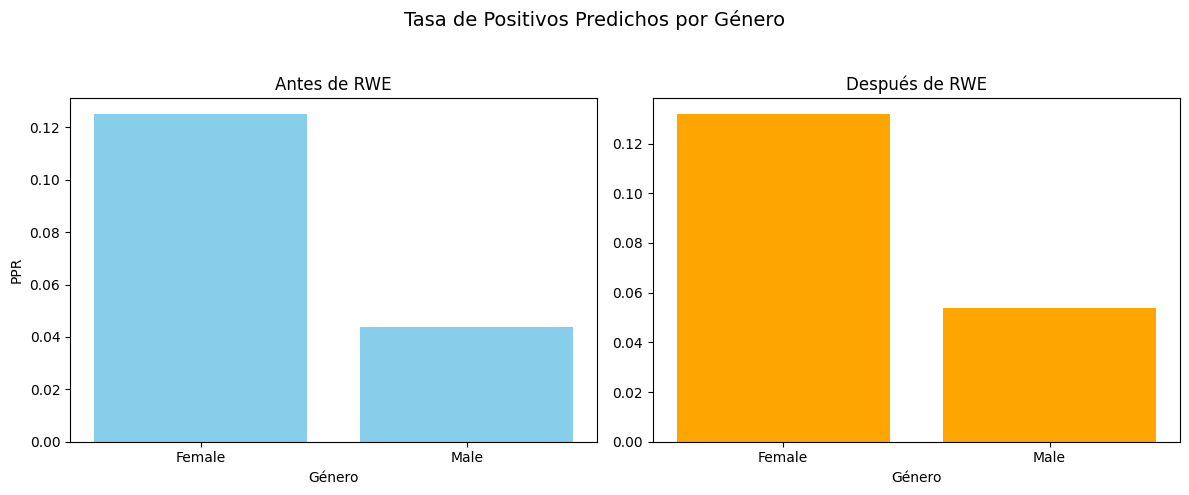

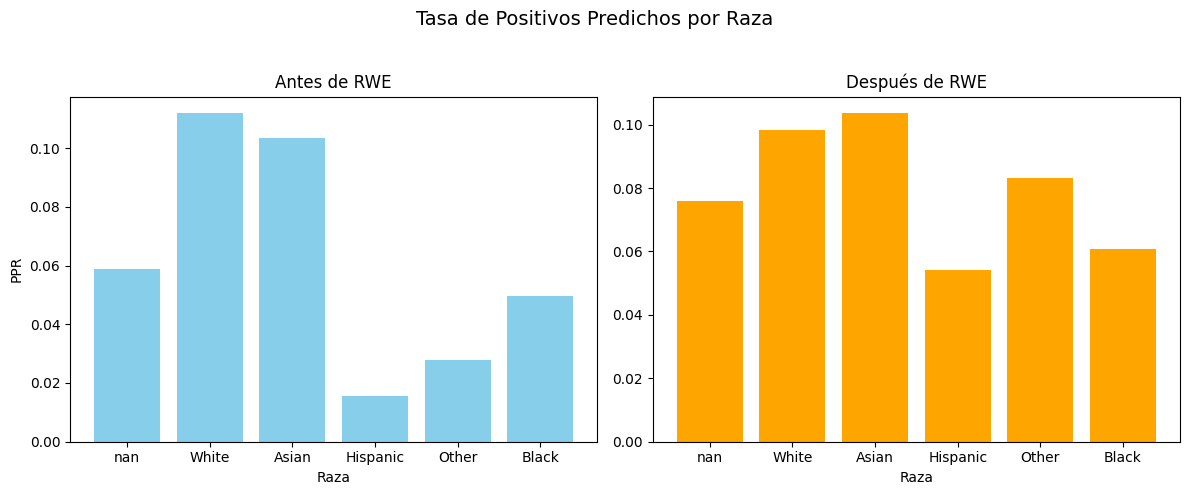

In [ ]:
# Gráfico de barra para mostrar diferencias en DPR y DPD
ppr_gender_rwe = calculate_ppr(X_test,'gender', y_pred_test_rwe)
ppr_race_rwe = calculate_ppr(X_test, 'race', y_pred_test_rwe)
labels = [str(key) if key == key else 'nan' for key in ppr_race_ind.keys()]  # Manejo especial para 'nan'
# Crear subplots para género
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas
fig.suptitle("Tasa de Positivos Predichos por Género", fontsize=14)

# Antes de RWE
ax[0].bar(ppr_gender_ind.keys(), ppr_gender_ind.values(), color='skyblue')
ax[0].set_title("Antes de RWE")
ax[0].set_ylabel("PPR")
ax[0].set_xlabel("Género")

# Después de RWE
ax[1].bar(ppr_gender_rwe.keys(), ppr_gender_rwe.values(), color='orange')
ax[1].set_title("Después de RWE")
ax[1].set_xlabel("Género")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar espacios
plt.show()

# Crear subplots para raza
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas
fig.suptitle("Tasa de Positivos Predichos por Raza", fontsize=14)

# Antes de RWE
ax[0].bar(labels, ppr_race_ind.values(), color='skyblue')
ax[0].set_title("Antes de RWE")
ax[0].set_ylabel("PPR")
ax[0].set_xlabel("Raza")

# Después de RWE
ax[1].bar(labels, ppr_race_rwe.values(), color='orange')
ax[1].set_title("Después de RWE")
ax[1].set_xlabel("Raza")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar espacios
plt.show()

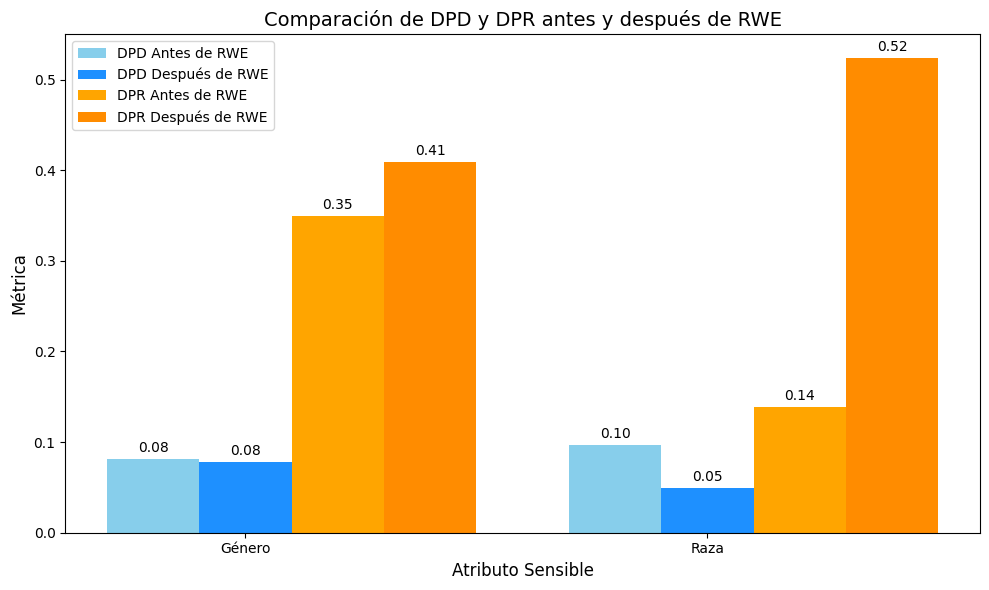

In [ ]:
# Comparación de la diferencia y ratio de la igualdad demográfica
dpd_gender_rwe = demographic_parity_difference(ppr_gender_rwe)
dpd_race_rwe = demographic_parity_difference(ppr_race_rwe)
dpr_gender_rwe = demographic_parity_ratio(ppr_gender_rwe)
dpr_race_rwe = demographic_parity_ratio(ppr_race_rwe)

# Datos para la visualización
labels = ['Género', 'Raza']
dpd_before = [dpd_gender, dpd_race]
dpd_after = [dpd_gender_rwe, dpd_race_rwe]
dpr_before = [dpr_gender, dpr_race]
dpr_after = [dpr_gender_rwe, dpr_race_rwe]

# Crear un gráfico de barras agrupadas
x = np.arange(len(labels))  # Posiciones para las etiquetas
width = 0.2  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Barras para DPD
bars_dpd_before = ax.bar(x - width, dpd_before, width, label='DPD Antes de RWE', color='skyblue')
bars_dpd_after = ax.bar(x, dpd_after, width, label='DPD Después de RWE', color='dodgerblue')

# Barras para DPR
bars_dpr_before = ax.bar(x + width, dpr_before, width, label='DPR Antes de RWE', color='orange')
bars_dpr_after = ax.bar(x + 2 * width, dpr_after, width, label='DPR Después de RWE', color='darkorange')

# Etiquetas y formato
ax.set_xlabel('Atributo Sensible', fontsize=12)
ax.set_ylabel('Métrica', fontsize=12)
ax.set_title('Comparación de DPD y DPR antes y después de RWE', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar valores encima de las barras
for bars in [bars_dpd_before, bars_dpd_after, bars_dpr_before, bars_dpr_after]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Mostrar valores con dos decimales
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento del texto
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



In [ ]:
X_test_rwe = X_test.copy()
X_test_rwe.drop(columns=['score'], inplace=True)
y_prob_rwe = clf_rwe.predict_proba(test_dataset_rwe.features)[:, 1]
X_test_rwe['score'] = y_prob_rwe

In [ ]:
tpr_dict_rwe, fpr_dict_rwe, youden_dict_rwe = equalized_odds(X_test_rwe, sensitive_col='race', label_col=y_test, score_col='score')

# Visualizar los resultados
for group, tpr in tpr_dict_rwe.items():
    print(f"Grupo: {dictionaries['race'][group]}, TPR: {tpr:.2f}, FPR: {fpr_dict_rwe[group]:.2f}, índice Youden: {youden_dict_rwe[group]:.2f}")

Grupo: nan, TPR: 0.19, FPR: 0.04, índice Youden: 0.14
Grupo: White, TPR: 0.25, FPR: 0.08, índice Youden: 0.16
Grupo: Asian, TPR: 0.28, FPR: 0.07, índice Youden: 0.21
Grupo: Hispanic, TPR: 0.08, FPR: 0.01, índice Youden: 0.07
Grupo: Other, TPR: 0.12, FPR: 0.00, índice Youden: 0.12
Grupo: Black, TPR: 0.19, FPR: 0.04, índice Youden: 0.15


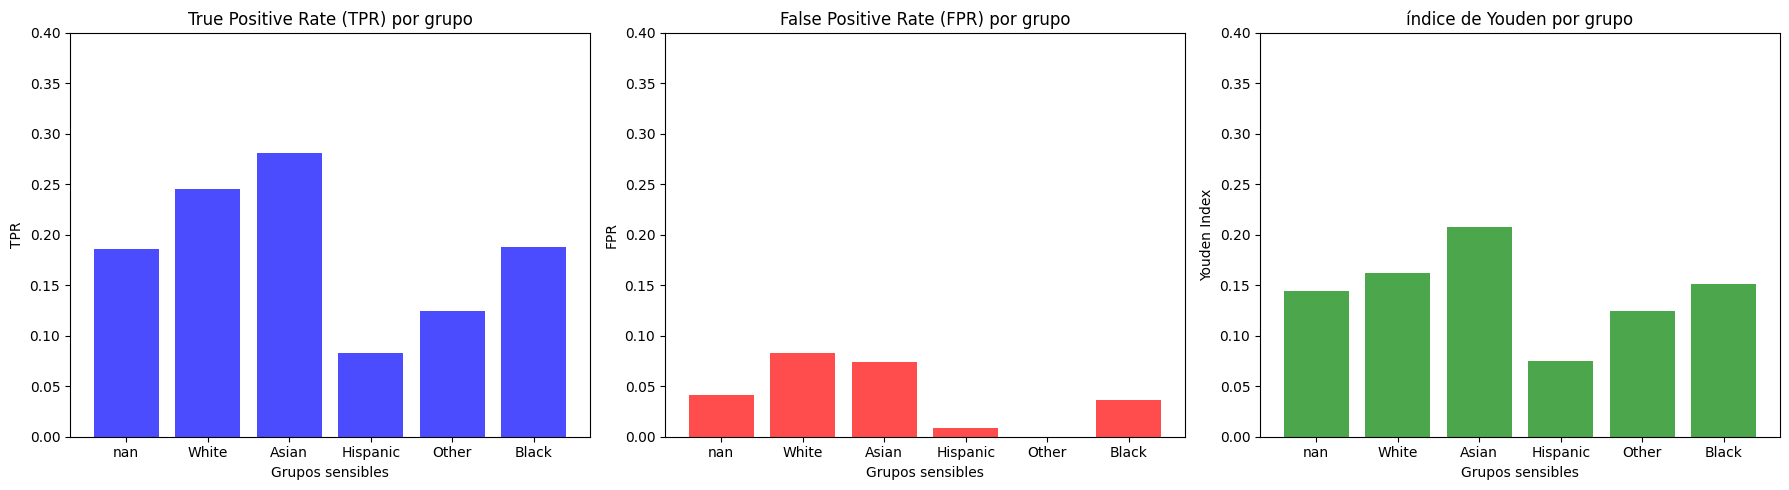

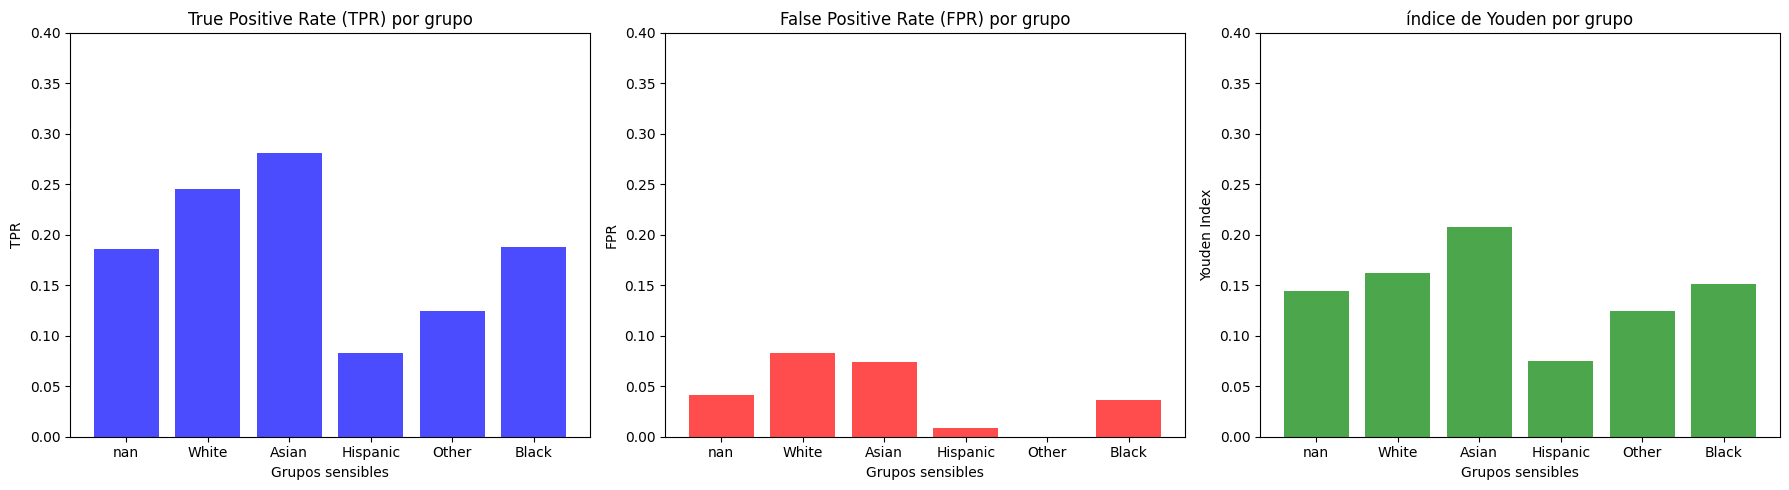

In [ ]:
plot_tpr_fpr(tpr_dict1, fpr_dict1, youden_dict1, 'race')
plot_tpr_fpr(tpr_dict_rwe, fpr_dict_rwe, youden_dict_rwe, 'race')


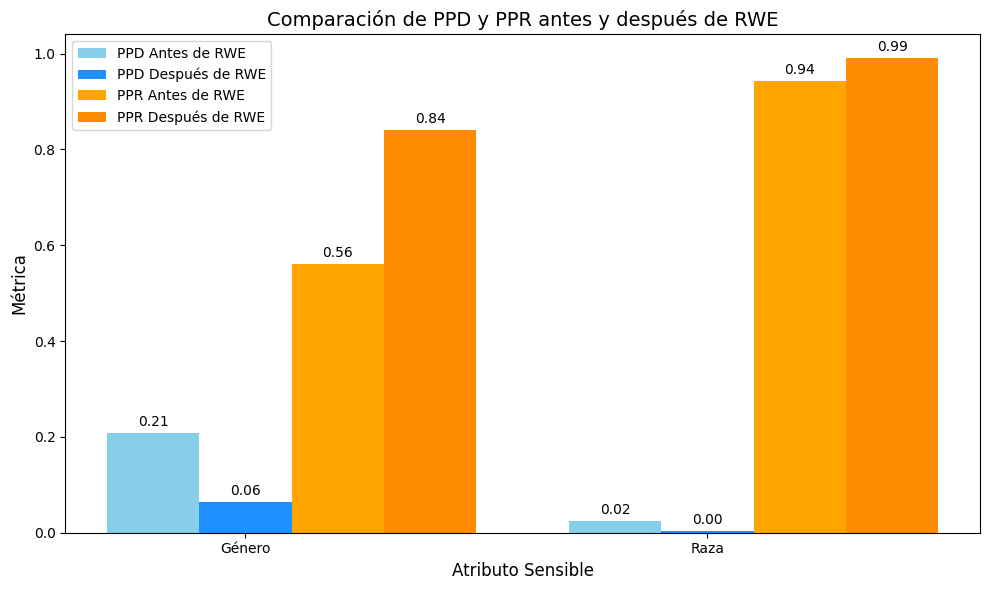

In [ ]:
# Calcular precisión para género y raza utilizando los valores privilegiados y no privilegiados
precision_gender_rwe = calculate_precision_parity(
    X_test,
    attribute='gender',
    y_true=y_test,
    y_pred=y_pred_test_rwe,
    privileged_values=[1],  # Códigos de los grupos privilegiados para género
    unprivileged_values=[0]  # Códigos de los grupos no privilegiados para género
)

precision_race_rwe = calculate_precision_parity(
    X_test,
    attribute='race',
    y_true=y_test,
    y_pred=y_pred_test_rwe,
    privileged_values=[4, 0],  # Códigos de los grupos privilegiados para raza
    unprivileged_values=[1, 2, 3]  # Códigos de los grupos no privilegiados para raza
)

# Calcular métricas de suficiencia
ppd_gender_rwe = predictive_parity_difference(precision_gender_rwe, attribute="género")
ppd_race_rwe = predictive_parity_difference(precision_race_rwe, attribute="raza")
ppr_gender_rwe = predictive_parity_ratio(precision_gender_rwe, attribute="género")
ppr_race_rwe = predictive_parity_ratio(precision_race_rwe, attribute="raza")

# Datos para la visualización
labels = ['Género', 'Raza']
ppd_before = [ppd_gender, ppd_race]  # Corrección aquí: se usaba 'ppr_race' incorrectamente
ppd_after = [ppd_gender_rwe, ppd_race_rwe]
ppr_before = [ppr_gender, ppr_race]
ppr_after = [ppr_gender_rwe, ppr_race_rwe]

# Crear un gráfico de barras agrupadas
x = np.arange(len(labels))  # Posiciones para las etiquetas
width = 0.2  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Barras para PPD
bars_dpd_before = ax.bar(x - width, ppd_before, width, label='PPD Antes de RWE', color='skyblue')
bars_dpd_after = ax.bar(x, ppd_after, width, label='PPD Después de RWE', color='dodgerblue')

# Barras para PPR
bars_dpr_before = ax.bar(x + width, ppr_before, width, label='PPR Antes de RWE', color='orange')
bars_dpr_after = ax.bar(x + 2 * width, ppr_after, width, label='PPR Después de RWE', color='darkorange')

# Etiquetas y formato
ax.set_xlabel('Atributo Sensible', fontsize=12)
ax.set_ylabel('Métrica', fontsize=12)
ax.set_title('Comparación de PPD y PPR antes y después de RWE', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar valores encima de las barras
for bars in [bars_dpd_before, bars_dpd_after, bars_dpr_before, bars_dpr_after]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Mostrar valores con dos decimales
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento del texto
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## In-Procesamiento

### Mitigación de sesgo en género

In [ ]:
import tensorflow as tf
from aif360.algorithms.inprocessing import AdversarialDebiasing
from aif360.datasets import BinaryLabelDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from aif360.metrics import ClassificationMetric

# Reiniciar el grafo predeterminado de TensorFlow y la sesión para evitar conflictos
tf.compat.v1.reset_default_graph()
if 'sess' in locals() and sess is not None:
    sess.close()
sess = tf.compat.v1.Session()

# Desactivar el modo eager execution
tf.compat.v1.disable_eager_execution()

# Dividir el DataFrame original en entrenamiento y prueba
train_df, test_df = train_test_split(bd, test_size=0.2, random_state=42)

# Filtrar datos para género (asegurando que solo estén presentes los valores 0 y 1)
train_df_gender = train_df[train_df['gender'].isin([0, 1])]
test_df_gender = test_df[test_df['gender'].isin([0, 1])]

# Verificar valores nulos y eliminarlos si es necesario
train_df_gender = train_df_gender.dropna()
test_df_gender = test_df_gender.dropna()

# Asegurarse de que las etiquetas solo contengan valores válidos (0 y 1)
train_df_gender = train_df_gender[train_df_gender['admission'].isin([0, 1])]
test_df_gender = test_df_gender[test_df_gender['admission'].isin([0, 1])]

# Crear conjuntos de entrenamiento y prueba para género
train_dataset_gender = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_df_gender,
    label_names=['admission'],
    protected_attribute_names=['gender']
)

test_dataset_gender = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_df_gender,
    label_names=['admission'],
    protected_attribute_names=['gender']
)

# Configurar grupos privilegiados y no privilegiados
privileged_groups_gender = [{'gender': 1}]  # Grupo privilegiado (1)
unprivileged_groups_gender = [{'gender': 0}]  # Grupo no privilegiado (0)

# Crear el modelo para género con manejo adecuado de variables
with tf.compat.v1.variable_scope('debiased_classifier_gender', reuse=tf.compat.v1.AUTO_REUSE):
    adversarial_debiasing_gender = AdversarialDebiasing(
        privileged_groups=privileged_groups_gender,
        unprivileged_groups=unprivileged_groups_gender,
        scope_name='debiased_classifier_gender',
        sess=sess,
        num_epochs=50
    )

# Verificar las dimensiones del conjunto de datos
print("Dimensiones del conjunto de entrenamiento (features):", train_dataset_gender.features.shape)
print("Dimensiones del conjunto de entrenamiento (labels):", train_dataset_gender.labels.shape)

# Entrenar el modelo
adversarial_debiasing_gender.fit(train_dataset_gender)

# Realizar predicciones en el conjunto de prueba
test_dataset_gender_pred = adversarial_debiasing_gender.predict(test_dataset_gender)

# Evaluar el desempeño del modelo
accuracy_gender = accuracy_score(test_dataset_gender.labels, test_dataset_gender_pred.labels)
print("Precisión (Género):", accuracy_gender)
print("\nReporte de clasificación (Género):")
print(classification_report(test_dataset_gender.labels, test_dataset_gender_pred.labels))

# Métricas de equidad para género
metric_gender = ClassificationMetric(
    test_dataset_gender, test_dataset_gender_pred,
    privileged_groups=privileged_groups_gender,
    unprivileged_groups=unprivileged_groups_gender
)

print("Impacto dispar (Género):", metric_gender.disparate_impact())
print("Diferencia de paridad demográfica (Género):", metric_gender.statistical_parity_difference())


Dimensiones del conjunto de entrenamiento (features): (4875, 8)
Dimensiones del conjunto de entrenamiento (labels): (4875, 1)
epoch 0; iter: 0; batch classifier loss: 0.575105; batch adversarial loss: 0.759507
epoch 1; iter: 0; batch classifier loss: 0.806474; batch adversarial loss: 0.923965
epoch 2; iter: 0; batch classifier loss: 0.905981; batch adversarial loss: 0.955352
epoch 3; iter: 0; batch classifier loss: 1.000702; batch adversarial loss: 0.975468
epoch 4; iter: 0; batch classifier loss: 1.174108; batch adversarial loss: 0.978223
epoch 5; iter: 0; batch classifier loss: 1.094097; batch adversarial loss: 0.931368
epoch 6; iter: 0; batch classifier loss: 0.992016; batch adversarial loss: 0.886057
epoch 7; iter: 0; batch classifier loss: 1.128266; batch adversarial loss: 0.848572
epoch 8; iter: 0; batch classifier loss: 1.065065; batch adversarial loss: 0.818356
epoch 9; iter: 0; batch classifier loss: 1.048155; batch adversarial loss: 0.791260
epoch 10; iter: 0; batch classifie

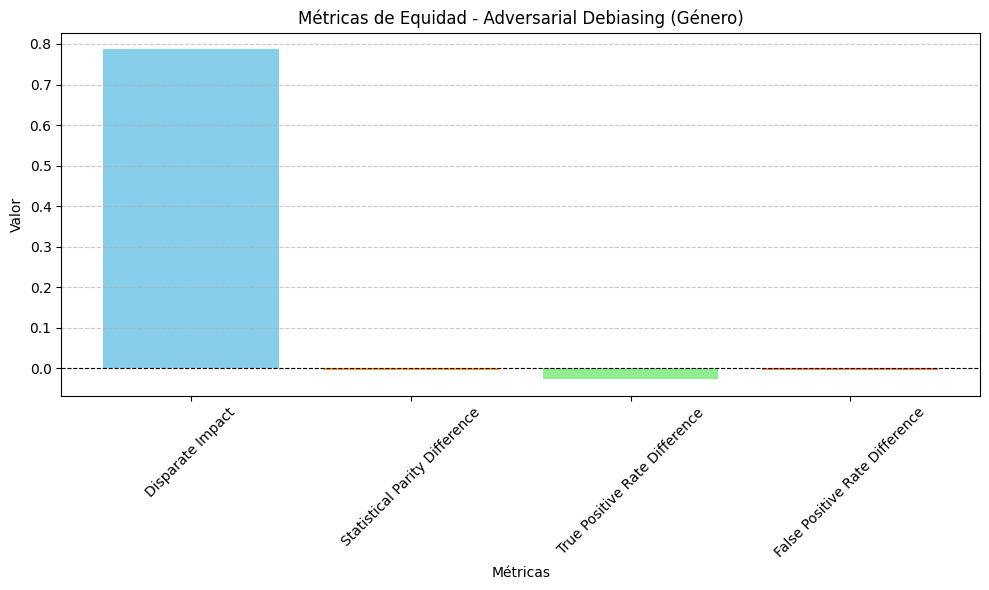

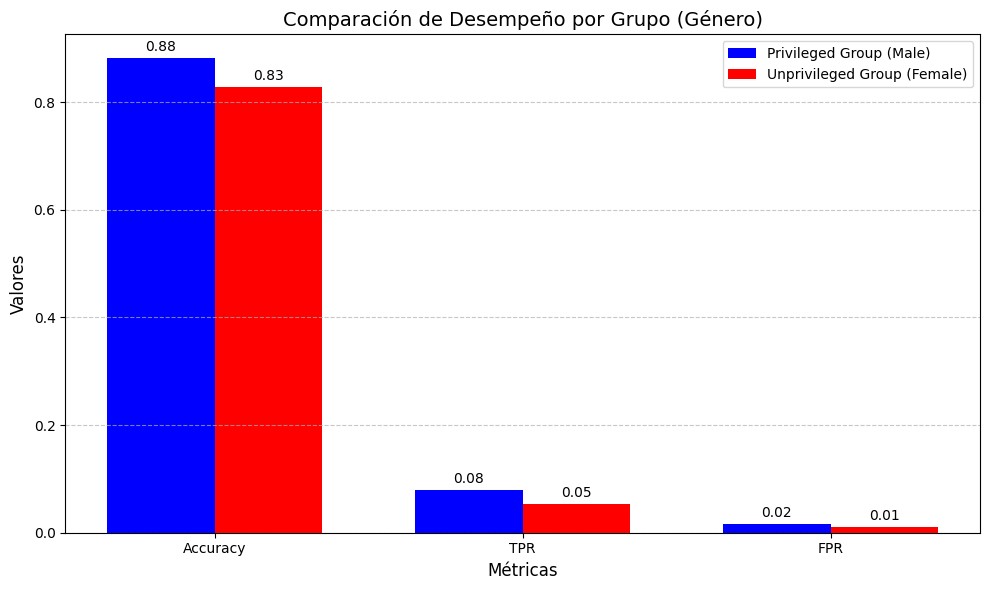

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener métricas relevantes para género
disparate_impact_gender = metric_gender.disparate_impact()
statistical_parity_difference_gender = metric_gender.statistical_parity_difference()
tpr_difference_gender = metric_gender.true_positive_rate_difference()
fpr_difference_gender = metric_gender.false_positive_rate_difference()

# Crear una lista de métricas y sus valores
metrics_gender = ["Disparate Impact", "Statistical Parity Difference",
                  "True Positive Rate Difference", "False Positive Rate Difference"]
values_gender = [disparate_impact_gender, statistical_parity_difference_gender,
                 tpr_difference_gender, fpr_difference_gender]

# Graficar métricas de equidad para género
plt.figure(figsize=(10, 6))
plt.bar(metrics_gender, values_gender, color=["skyblue", "orange", "lightgreen", "coral"])
plt.title("Métricas de Equidad - Adversarial Debiasing (Género)")
plt.ylabel("Valor")
plt.xlabel("Métricas")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea de referencia
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()  # Ajustar diseño
plt.show()

# Visualizar precisión por grupo de género
privileged_metrics_gender = {
    "Accuracy": metric_gender.accuracy(privileged=True),
    "TPR": metric_gender.true_positive_rate(privileged=True),
    "FPR": metric_gender.false_positive_rate(privileged=True)
}
unprivileged_metrics_gender = {
    "Accuracy": metric_gender.accuracy(privileged=False),
    "TPR": metric_gender.true_positive_rate(privileged=False),
    "FPR": metric_gender.false_positive_rate(privileged=False)
}

# Crear gráficos comparativos entre grupos de género
x_gender = np.arange(len(privileged_metrics_gender))  # Posición en el eje x
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
bars1_gender = ax.bar(x_gender - width/2, privileged_metrics_gender.values(), width,
                      label='Privileged Group (Male)', color="blue")
bars2_gender = ax.bar(x_gender + width/2, unprivileged_metrics_gender.values(), width,
                      label='Unprivileged Group (Female)', color="red")

# Etiquetas y título
ax.set_xlabel('Métricas', fontsize=12)
ax.set_ylabel('Valores', fontsize=12)
ax.set_title('Comparación de Desempeño por Grupo (Género)', fontsize=14)
ax.set_xticks(x_gender)
ax.set_xticklabels(privileged_metrics_gender.keys(), fontsize=10)
ax.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar valores encima de las barras
for bars in [bars1_gender, bars2_gender]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Mostrar valores con dos decimales
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento del texto
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Ajustar diseño
plt.show()

### Mitigación de sesgo en Raza

In [ ]:
import tensorflow as tf
from aif360.algorithms.inprocessing import AdversarialDebiasing
from aif360.datasets import BinaryLabelDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from aif360.metrics import ClassificationMetric

# Reiniciar el grafo predeterminado de TensorFlow y la sesión para evitar conflictos
tf.compat.v1.reset_default_graph()
if 'sess' in locals() and sess is not None:
    sess.close()
sess = tf.compat.v1.Session()

# Desactivar el modo eager execution
tf.compat.v1.disable_eager_execution()

# Dividir el DataFrame original en entrenamiento y prueba
train_df, test_df = train_test_split(bd, test_size=0.2, random_state=42)

# Filtrar los datos para asegurar que ambos grupos estén presentes
privileged_value = 0  # Grupo privilegiado
unprivileged_value = 1  # Grupo no privilegiado
train_df = train_df[train_df['race'].isin([privileged_value, unprivileged_value])]
test_df = test_df[test_df['race'].isin([privileged_value, unprivileged_value])]

# Crear conjuntos de entrenamiento y prueba para la raza
train_dataset_race = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_df,
    label_names=['admission'],
    protected_attribute_names=['race']
)

test_dataset_race = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_df,
    label_names=['admission'],
    protected_attribute_names=['race']
)

# Configurar grupos privilegiados y no privilegiados
privileged_groups = [{'race': privileged_value}]  # Grupo privilegiado (0)
unprivileged_groups = [{'race': unprivileged_value}]  # Grupo no privilegiado (1)

# Crear el modelo Adversarial Debiasing con manejo adecuado del scope
with tf.compat.v1.variable_scope('debiased_classifier_race', reuse=tf.compat.v1.AUTO_REUSE):
    adversarial_debiasing = AdversarialDebiasing(
        privileged_groups=privileged_groups,
        unprivileged_groups=unprivileged_groups,
        scope_name='debiased_classifier_race',  # Nombre único del scope
        sess=sess,
        num_epochs=50
    )

# Entrenar el modelo
adversarial_debiasing.fit(train_dataset_race)

# Realizar predicciones en el conjunto de prueba
test_dataset_race_pred = adversarial_debiasing.predict(test_dataset_race)

# Evaluar el desempeño del modelo
accuracy = accuracy_score(test_dataset_race.labels, test_dataset_race_pred.labels)
print("Precisión en el conjunto de prueba:", accuracy)

# Reporte de clasificación ajustado para evitar warnings
report = classification_report(
    test_dataset_race.labels,
    test_dataset_race_pred.labels,
    zero_division=0  # Maneja etiquetas sin muestras estableciendo precisión como 0
)
print("\nReporte de clasificación:")
print(report)

# Calcular métricas de equidad
metric_test = ClassificationMetric(
    test_dataset_race, test_dataset_race_pred,
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups
)

print("Impacto dispar (prueba):", metric_test.disparate_impact())
print("Diferencia de paridad demográfica (prueba):", metric_test.statistical_parity_difference())
print("True Positive Rate Difference (prueba):", metric_test.true_positive_rate_difference())
print("False Positive Rate Difference (prueba):", metric_test.false_positive_rate_difference())


epoch 0; iter: 0; batch classifier loss: 0.831321; batch adversarial loss: 0.749058
epoch 1; iter: 0; batch classifier loss: 0.744363; batch adversarial loss: 0.701230
epoch 2; iter: 0; batch classifier loss: 0.604893; batch adversarial loss: 0.714285
epoch 3; iter: 0; batch classifier loss: 0.576525; batch adversarial loss: 0.680386
epoch 4; iter: 0; batch classifier loss: 0.490546; batch adversarial loss: 0.693986
epoch 5; iter: 0; batch classifier loss: 0.347995; batch adversarial loss: 0.687576
epoch 6; iter: 0; batch classifier loss: 0.377340; batch adversarial loss: 0.690715
epoch 7; iter: 0; batch classifier loss: 0.472339; batch adversarial loss: 0.687726
epoch 8; iter: 0; batch classifier loss: 0.394124; batch adversarial loss: 0.690210
epoch 9; iter: 0; batch classifier loss: 0.493282; batch adversarial loss: 0.691031
epoch 10; iter: 0; batch classifier loss: 0.393778; batch adversarial loss: 0.697000
epoch 11; iter: 0; batch classifier loss: 0.361537; batch adversarial loss:

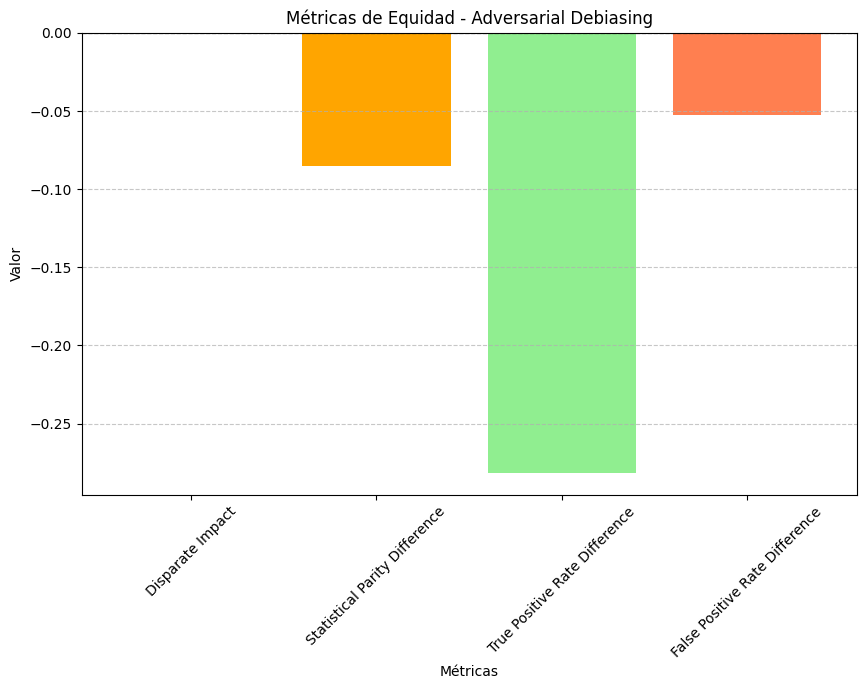

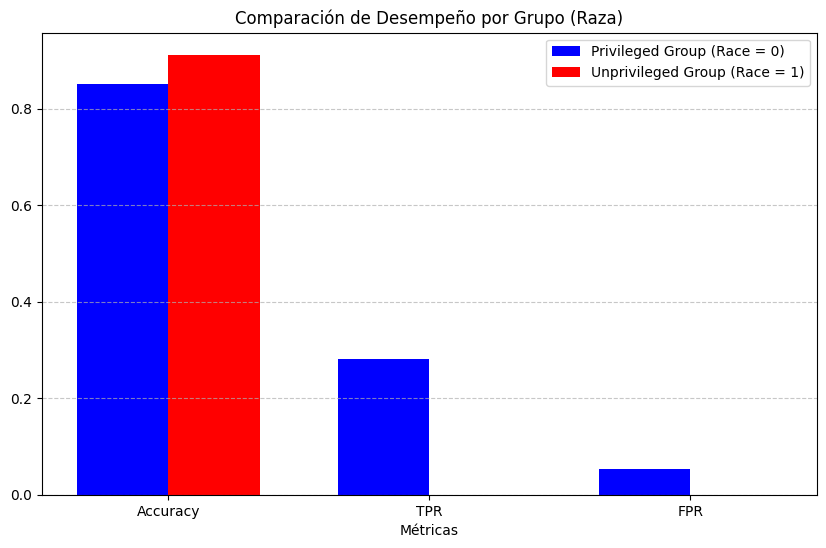

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener métricas relevantes del modelo
disparate_impact = metric_test.disparate_impact()
statistical_parity_difference = metric_test.statistical_parity_difference()
tpr_difference = metric_test.true_positive_rate_difference()
fpr_difference = metric_test.false_positive_rate_difference()

# Crear una lista de métricas y sus valores
metrics = ["Disparate Impact", "Statistical Parity Difference",
           "True Positive Rate Difference", "False Positive Rate Difference"]
values = [disparate_impact, statistical_parity_difference, tpr_difference, fpr_difference]

# Graficar métricas de equidad
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=["skyblue", "orange", "lightgreen", "coral"])
plt.title("Métricas de Equidad - Adversarial Debiasing")
plt.ylabel("Valor")
plt.xlabel("Métricas")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea de referencia
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Métricas por grupo privilegiado y no privilegiado
privileged_metrics = {
    "Accuracy": metric_test.accuracy(privileged=True),  # Precisión para grupo privilegiado
    "TPR": metric_test.true_positive_rate(privileged=True),  # TPR para grupo privilegiado
    "FPR": metric_test.false_positive_rate(privileged=True)  # FPR para grupo privilegiado
}
unprivileged_metrics = {
    "Accuracy": metric_test.accuracy(privileged=False),  # Precisión para grupo no privilegiado
    "TPR": metric_test.true_positive_rate(privileged=False),  # TPR para grupo no privilegiado
    "FPR": metric_test.false_positive_rate(privileged=False)  # FPR para grupo no privilegiado
}

# Crear gráficos comparativos entre grupos
x = np.arange(len(privileged_metrics))  # Posición en el eje x
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, privileged_metrics.values(), width, label='Privileged Group (Race = 0)', color="blue")
bars2 = ax.bar(x + width/2, unprivileged_metrics.values(), width, label='Unprivileged Group (Race = 1)', color="red")

# Etiquetas y título
ax.set_xlabel('Métricas')
ax.set_title('Comparación de Desempeño por Grupo (Raza)')
ax.set_xticks(x)
ax.set_xticklabels(privileged_metrics.keys())
ax.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Mitigación de sesgo para ambos atributos sensibles

In [ ]:
import tensorflow as tf
from aif360.algorithms.inprocessing import AdversarialDebiasing
from aif360.datasets import BinaryLabelDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from aif360.metrics import ClassificationMetric

# Reiniciar el grafo predeterminado de TensorFlow y la sesión para evitar conflictos
tf.compat.v1.reset_default_graph()
if 'sess' in locals() and sess is not None:
    sess.close()
sess = tf.compat.v1.Session()

# Desactivar el modo eager execution
tf.compat.v1.disable_eager_execution()

# Dividir el DataFrame original en entrenamiento y prueba
train_df, test_df = train_test_split(bd, test_size=0.2, random_state=42)

# Verificar los valores únicos en los atributos 'gender' y 'race'
print("Valores únicos en 'gender':", bd['gender'].unique())
print("Valores únicos en 'race':", bd['race'].unique())

# Filtrar datos para asegurar que ambos atributos sensibles estén presentes
privileged_values = {'gender': 1, 'race': 0}  # Grupo privilegiado
unprivileged_values = {'gender': 0, 'race': 1}  # Grupo no privilegiado
train_df = train_df[
    train_df['gender'].isin([privileged_values['gender'], unprivileged_values['gender']]) &
    train_df['race'].isin([privileged_values['race'], unprivileged_values['race']])
]
test_df = test_df[
    test_df['gender'].isin([privileged_values['gender'], unprivileged_values['gender']]) &
    test_df['race'].isin([privileged_values['race'], unprivileged_values['race']])
]

# Crear conjuntos de entrenamiento y prueba para ambos atributos sensibles
train_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_df,
    label_names=['admission'],
    protected_attribute_names=['gender', 'race']
)

test_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_df,
    label_names=['admission'],
    protected_attribute_names=['gender', 'race']
)

# Configurar grupos privilegiados y no privilegiados
privileged_groups = [{'gender': privileged_values['gender'], 'race': privileged_values['race']}]
unprivileged_groups = [{'gender': unprivileged_values['gender'], 'race': unprivileged_values['race']}]

# Crear el modelo Adversarial Debiasing con manejo adecuado del scope
with tf.compat.v1.variable_scope('debiased_classifier_gender_race', reuse=tf.compat.v1.AUTO_REUSE):
    adversarial_debiasing = AdversarialDebiasing(
        privileged_groups=privileged_groups,
        unprivileged_groups=unprivileged_groups,
        scope_name='debiased_classifier_gender_race',  # Nombre único del scope
        sess=sess,
        num_epochs=50
    )

# Entrenar el modelo
adversarial_debiasing.fit(train_dataset)

# Realizar predicciones en el conjunto de prueba
test_dataset_pred = adversarial_debiasing.predict(test_dataset)

# Evaluar el desempeño del modelo
accuracy = accuracy_score(test_dataset.labels, test_dataset_pred.labels)
print("Precisión en el conjunto de prueba:", accuracy)

# Reporte de clasificación ajustado para evitar warnings
report = classification_report(
    test_dataset.labels,
    test_dataset_pred.labels,
    zero_division=0  # Manejar etiquetas sin muestras
)
print("\nReporte de clasificación:")
print(report)

# Calcular métricas de equidad
metric_test = ClassificationMetric(
    test_dataset, test_dataset_pred,
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups
)

print("Impacto dispar (prueba):", metric_test.disparate_impact())
print("Diferencia de paridad demográfica (prueba):", metric_test.statistical_parity_difference())
print("True Positive Rate Difference (prueba):", metric_test.true_positive_rate_difference())
print("False Positive Rate Difference (prueba):", metric_test.false_positive_rate_difference())



Valores únicos en 'gender': [0 1]
Valores únicos en 'race': [0 1 5 2 4 3]
epoch 0; iter: 0; batch classifier loss: 0.732632; batch adversarial loss: 0.694785
epoch 1; iter: 0; batch classifier loss: 0.458161; batch adversarial loss: 0.695407
epoch 2; iter: 0; batch classifier loss: 0.445482; batch adversarial loss: 0.695758
epoch 3; iter: 0; batch classifier loss: 0.371182; batch adversarial loss: 0.690790
epoch 4; iter: 0; batch classifier loss: 0.352623; batch adversarial loss: 0.687933
epoch 5; iter: 0; batch classifier loss: 0.393893; batch adversarial loss: 0.685581
epoch 6; iter: 0; batch classifier loss: 0.426225; batch adversarial loss: 0.687766
epoch 7; iter: 0; batch classifier loss: 0.421376; batch adversarial loss: 0.680548
epoch 8; iter: 0; batch classifier loss: 0.389860; batch adversarial loss: 0.678377
epoch 9; iter: 0; batch classifier loss: 0.457916; batch adversarial loss: 0.676373
epoch 10; iter: 0; batch classifier loss: 0.459693; batch adversarial loss: 0.671737
e

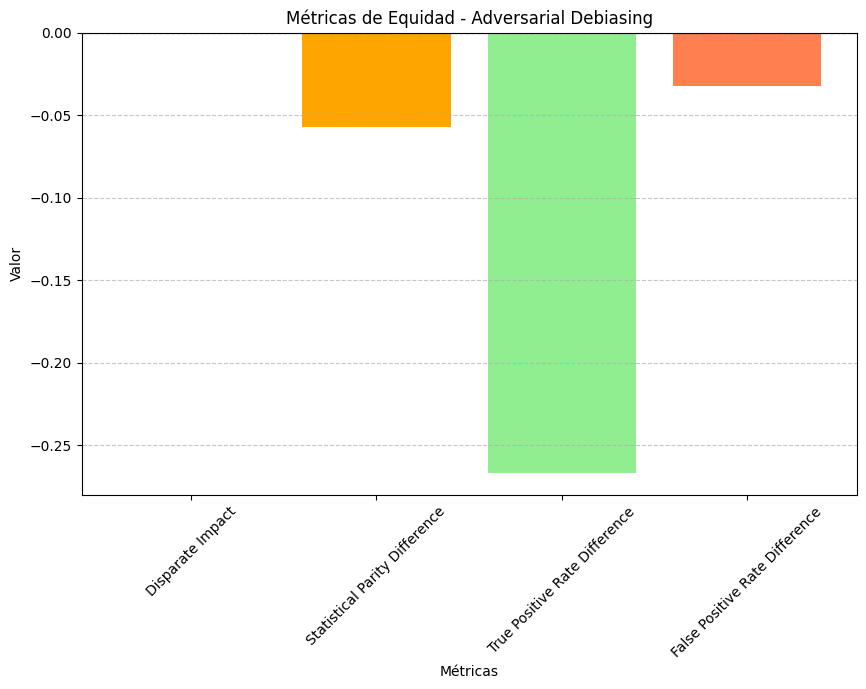

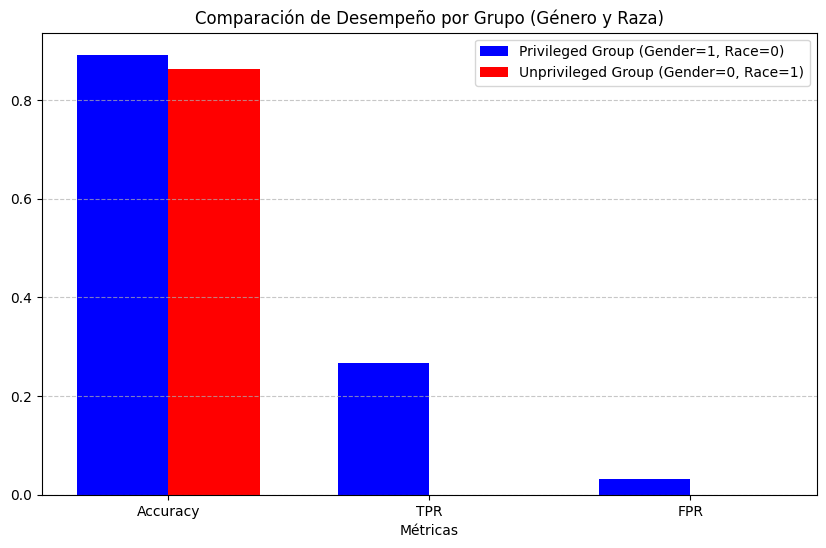

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener métricas relevantes del modelo
disparate_impact = metric_test.disparate_impact()
statistical_parity_difference = metric_test.statistical_parity_difference()
tpr_difference = metric_test.true_positive_rate_difference()
fpr_difference = metric_test.false_positive_rate_difference()

# Crear una lista de métricas y sus valores
metrics = ["Disparate Impact", "Statistical Parity Difference",
           "True Positive Rate Difference", "False Positive Rate Difference"]
values = [disparate_impact, statistical_parity_difference, tpr_difference, fpr_difference]

# Graficar métricas de equidad
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=["skyblue", "orange", "lightgreen", "coral"])
plt.title("Métricas de Equidad - Adversarial Debiasing")
plt.ylabel("Valor")
plt.xlabel("Métricas")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea de referencia
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Métricas por grupo privilegiado y no privilegiado
privileged_metrics = {
    "Accuracy": metric_test.accuracy(privileged=True),
    "TPR": metric_test.true_positive_rate(privileged=True),
    "FPR": metric_test.false_positive_rate(privileged=True)
}
unprivileged_metrics = {
    "Accuracy": metric_test.accuracy(privileged=False),
    "TPR": metric_test.true_positive_rate(privileged=False),
    "FPR": metric_test.false_positive_rate(privileged=False)
}

# Crear gráficos comparativos entre grupos
x = np.arange(len(privileged_metrics))  # Posición en el eje x
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, privileged_metrics.values(), width, label='Privileged Group (Gender=1, Race=0)', color="blue")
bars2 = ax.bar(x + width/2, unprivileged_metrics.values(), width, label='Unprivileged Group (Gender=0, Race=1)', color="red")

# Etiquetas y título
ax.set_xlabel('Métricas')
ax.set_title('Comparación de Desempeño por Grupo (Género y Raza)')
ax.set_xticks(x)
ax.set_xticklabels(privileged_metrics.keys())
ax.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Post-Procesamiento

### Mitigación de sesgo en género

In [ ]:
import copy

# En primer lugar, crearé copias del modelo para que siempre se use el entrenado original.
best_rf_model_post_gender = copy.deepcopy(best_rf_model)
best_rf_model_post_race = copy.deepcopy(best_rf_model)
best_rf_model_post_both = copy.deepcopy(best_rf_model)



In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.postprocessing import EqOddsPostprocessing

from aif360.metrics import ClassificationMetric

# AIF260 usa BinaryLabelDatasets para manejar datos, por lo que hay que convertir!

# técnica diseñada para ajustar las predicciones de un modelo de manera que se cumpla el criterio de Equalized Odds.
# Este criterio exige que las tasas de verdaderos positivos (TPR) y falsos positivos (FPR) sean iguales entre todos los grupos sensibles

# Esta primera función maneja la mitigación de una sola columna sensible
def eq_odds_post_processing_single(df_train, y_train, df_test, y_test, att1, best_model):

  #diccionario para race:['Asian' 'Black' 'Hispanic' 'Other' 'White' nan]
  #diccionario para gender:['Female' 'Male']

  # grupos privilegiados / no privilegiados se establecen en base a lo observado en Equalized Odds
  if att1 == 'race':
    privileged_groups = [{att1: 0}, {att1: 4}] # White & Asian
    unprivileged_groups = [{att1: 1}, {att1: 2}, {att1: 3}] # Black, Hispanic, Other
  elif att1 == 'gender':
    privileged_groups = [{att1: 0}] # Female
    unprivileged_groups = [{att1: 1}]
  else:
    raise ValueError("att1 debe ser 'race' o 'gender'")

  #Ajustar las probabilidades post-predicción
  #Generar las nuevas predicciones

  att1_train = df_train[att1]

  # Crear el DataFrame de entrenamiento
  train_df = pd.DataFrame({
      'label': y_train,  # Las etiquetas reales de entrenamiento
      att1: att1_train  # Atributo sensible 1
  })

  # Crear el BinaryLabelDataset para el conjunto de entrenamiento
  train_dataset = BinaryLabelDataset(
      favorable_label=1,
      unfavorable_label=0,
      df=train_df,  # El DataFrame con las etiquetas y los atributos sensibles
      label_names=['label'],  # Nombre de la columna de etiquetas
      protected_attribute_names=[att1]  # Nombres de los atributos sensibles
  )

  train_data_pred = train_dataset.copy()
  y_pred_train = best_model.predict(X_train)
  train_data_pred.labels = y_pred_train

  att1_test = df_test[att1]

  # Crear el DataFrame de prueba
  test_df = pd.DataFrame({
      'label': y_test,  # Las etiquetas reales de prueba
      att1: att1_test  # Atributo sensible 1
  })

  test_dataset = BinaryLabelDataset(
      favorable_label=1,
      unfavorable_label=0,
      df=test_df,  # El DataFrame con las etiquetas y los atributos sensibles
      label_names=['label'],  # Nombre de la columna de etiquetas
      protected_attribute_names=[att1]  # Nombres de los atributos sensibles
  )

  test_data_pred = test_dataset.copy()
  y_pred_test = best_model.predict(X_test)
  test_data_pred.labels = y_pred_test

  # Crear un BinaryLabelDataset con las predicciones originales
  test_data_pred_orig = test_dataset.copy()
  test_data_pred_orig.labels = y_pred_test.reshape(-1, 1)  # Predicciones originales del modelo

  # Crear un objeto ClassificationMetric para las predicciones originales
  metric_pre = ClassificationMetric(
      test_dataset,  # Conjunto real (ground truth)
      test_data_pred_orig,  # Conjunto con predicciones originales
      privileged_groups=privileged_groups,
      unprivileged_groups=unprivileged_groups
  )

  # Métricas de precisión
  accuracy_pre = accuracy_score(test_dataset.labels, test_data_pred_orig.labels)
  f1_pre = f1_score(test_dataset.labels, test_data_pred_orig.labels)

  print("Accuracy antes de Equalized Odds:", accuracy_pre)
  print("F1 Score antes de Equalized Odds:", f1_pre)

  # Métricas específicas de Equalized Odds
  average_abs_odds_diff_pre = metric_pre.average_abs_odds_difference()
  equal_opportunity_diff_pre = metric_pre.equal_opportunity_difference()

  print("Diferencia promedio en TPR y FPR (Average Absolute Odds Difference) antes:", average_abs_odds_diff_pre)
  print("Diferencia de Oportunidades Iguales (Equal Opportunity Difference) antes:", equal_opportunity_diff_pre)

  # Opcional: Ver TPR y FPR por grupo antes del post-processing
  tpr_per_group_pre = metric_pre.true_positive_rate()
  fpr_per_group_pre = metric_pre.false_positive_rate()

  print("TPR por grupo antes del post-processing:", tpr_per_group_pre)
  print("FPR por grupo antes del post-processing:", fpr_per_group_pre)



  # Aplicar Equalized Odds
  eq_odds = EqOddsPostprocessing(unprivileged_groups=unprivileged_groups,
                                privileged_groups=privileged_groups)

  train_dataset.labels = train_dataset.labels.reshape(-1, 1)
  train_data_pred.labels = train_data_pred.labels.reshape(-1, 1)
  test_data_pred.labels = test_data_pred.labels.reshape(-1, 1)

  # Ajustar las predicciones
  eq_odds = eq_odds.fit(train_dataset, train_data_pred)
  adjusted_test_dataset = eq_odds.predict(test_data_pred)

  # Crear un objeto ClassificationMetric para el conjunto post-procesado
  metric_post = ClassificationMetric(
      test_dataset,  # Conjunto real (ground truth)
      adjusted_test_dataset,  # Conjunto ajustado tras EqOdds
      privileged_groups=privileged_groups,
      unprivileged_groups=unprivileged_groups
  )

  # Métricas de precisión
  accuracy = accuracy_score(test_dataset.labels, adjusted_test_dataset.labels)
  f1 = f1_score(test_dataset.labels, adjusted_test_dataset.labels)

  print("Accuracy después de Equalized Odds:", accuracy)
  print("F1 Score después de Equalized Odds:", f1)

  # Métricas específicas de Equalized Odds
  average_abs_odds_diff = metric_post.average_abs_odds_difference()
  equal_opportunity_diff = metric_post.equal_opportunity_difference()

  print("Diferencia promedio en TPR y FPR (Average Absolute Odds Difference):", average_abs_odds_diff)
  print("Diferencia de Oportunidades Iguales (Equal Opportunity Difference):", equal_opportunity_diff)

  # Opcional: Ver TPR y FPR por grupo
  tpr_per_group = metric_post.true_positive_rate()
  fpr_per_group = metric_post.false_positive_rate()

  print("TPR por grupo:", tpr_per_group)
  print("FPR por grupo:", fpr_per_group)


In [ ]:
X_test

In [ ]:
X_test = X_test.drop(columns=['score'])

In [ ]:
eq_odds_post_processing_single(X_train, y_train, X_test, y_test, att1='gender', best_model=best_rf_model_post_gender)

### Mitigación de sesgo en raza

In [ ]:
eq_odds_post_processing_single(X_train, y_train, X_test, y_test, att1='race', best_model=best_rf_model_post_race)

### Mitigación de sesgo para ambos atributos sensibles.

In [ ]:
def eq_odds_post_processing_two(df_train, y_train, df_test, y_test, att1, att2, best_model):

  #Ajustar las probabilidades post-predicción
  #Generar las nuevas predicciones

  att1_train = df_train[att1]
  att2_train = df_train[att2]

  # Crear el DataFrame de entrenamiento
  train_df = pd.DataFrame({
      'label': y_train,  # Las etiquetas reales de entrenamiento
      att1: att1_train,  # Atributo sensible 1
      att2: att2_train,  # Atributo sensible 2
  })

  # Crear el BinaryLabelDataset para el conjunto de entrenamiento
  train_dataset = BinaryLabelDataset(
      favorable_label=1,
      unfavorable_label=0,
      df=train_df,  # El DataFrame con las etiquetas y los atributos sensibles
      label_names=['label'],  # Nombre de la columna de etiquetas
      protected_attribute_names=[att1, att2]  # Nombres de los atributos sensibles
  )

  train_data_pred = train_dataset.copy()
  y_pred_train = best_model.predict(X_train)
  train_data_pred.labels = y_pred_train

  att1_test = df_test[att1]
  att2_test = df_test[att2]

  # Crear el DataFrame de prueba
  test_df = pd.DataFrame({
      'label': y_test,  # Las etiquetas reales de prueba
      att1: att1_test,  # Atributo sensible 1
      att2: att2_test,  # Atributo sensible 2
  })

  test_dataset = BinaryLabelDataset(
      favorable_label=1,
      unfavorable_label=0,
      df=test_df,  # El DataFrame con las etiquetas y los atributos sensibles
      label_names=['label'],  # Nombre de la columna de etiquetas
      protected_attribute_names=[att1, att2]  # Nombres de los atributos sensibles
  )

  #diccionario para race:['Asian' 'Black' 'Hispanic' 'Other' 'White' nan]
  #diccionario para gender:['Female' 'Male']

  test_data_pred = test_dataset.copy()
  y_pred_test = best_model.predict(X_test)

  test_data_pred.labels = y_pred_test # Crear un BinaryLabelDataset con las predicciones originales
  test_data_pred_orig = test_dataset.copy()
  test_data_pred_orig.labels = y_pred_test.reshape(-1, 1)  # Predicciones originales del modelo

  unprivileged_groups = [{att1: 1, att2: 0}, {att1: 2, att2: 0}, {att1: 3, att2: 0},{att1: 1, att2: 1}, {att1: 2, att2: 1}, {att1: 3, att2: 1}]
  privileged_groups = [{att1: 4, att2: 1}, {att1: 0, att2: 1}]
  # Crear un objeto ClassificationMetric para las predicciones originales
  metric_pre = ClassificationMetric(
      test_dataset,  # Conjunto real (ground truth)
      test_data_pred_orig,  # Conjunto con predicciones originales
      privileged_groups=privileged_groups,
      unprivileged_groups=unprivileged_groups
  )

  # Métricas de precisión
  accuracy_pre = accuracy_score(test_dataset.labels, test_data_pred_orig.labels)
  f1_pre = f1_score(test_dataset.labels, test_data_pred_orig.labels)

  print("Accuracy antes de Equalized Odds:", accuracy_pre)
  print("F1 Score antes de Equalized Odds:", f1_pre)

  # Métricas específicas de Equalized Odds
  average_abs_odds_diff_pre = metric_pre.average_abs_odds_difference()
  equal_opportunity_diff_pre = metric_pre.equal_opportunity_difference()

  print("Diferencia promedio en TPR y FPR (Average Absolute Odds Difference) antes:", average_abs_odds_diff_pre)
  print("Diferencia de Oportunidades Iguales (Equal Opportunity Difference) antes:", equal_opportunity_diff_pre)

  # Opcional: Ver TPR y FPR por grupo antes del post-processing
  tpr_per_group_pre = metric_pre.true_positive_rate()
  fpr_per_group_pre = metric_pre.false_positive_rate()

  print("TPR por grupo antes del post-processing:", tpr_per_group_pre)
  print("FPR por grupo antes del post-processing:", fpr_per_group_pre)


  # Aplicar Equalized Odds
  eq_odds = EqOddsPostprocessing(unprivileged_groups=unprivileged_groups,
                                privileged_groups=privileged_groups)

  train_dataset.labels = train_dataset.labels.reshape(-1, 1)
  train_data_pred.labels = train_data_pred.labels.reshape(-1, 1)
  test_data_pred.labels = test_data_pred.labels.reshape(-1, 1)

  # Ajustar las predicciones
  eq_odds = eq_odds.fit(train_dataset, train_data_pred)
  adjusted_test_dataset = eq_odds.predict(test_data_pred)

  # Crear un objeto ClassificationMetric para el conjunto post-procesado
  metric_post = ClassificationMetric(
      test_dataset,  # Conjunto real (ground truth)
      adjusted_test_dataset,  # Conjunto ajustado tras EqOdds
      privileged_groups=privileged_groups,
      unprivileged_groups=unprivileged_groups
  )

  # Métricas de precisión
  accuracy = accuracy_score(test_dataset.labels, adjusted_test_dataset.labels)
  f1 = f1_score(test_dataset.labels, adjusted_test_dataset.labels)

  print("Accuracy después de Equalized Odds:", accuracy)
  print("F1 Score después de Equalized Odds:", f1)

  # Métricas específicas de Equalized Odds
  average_abs_odds_diff = metric_post.average_abs_odds_difference()
  equal_opportunity_diff = metric_post.equal_opportunity_difference()

  print("Diferencia promedio en TPR y FPR (Average Absolute Odds Difference):", average_abs_odds_diff)
  print("Diferencia de Oportunidades Iguales (Equal Opportunity Difference):", equal_opportunity_diff)

  # Opcional: Ver TPR y FPR por grupo
  tpr_per_group = metric_post.true_positive_rate()
  fpr_per_group = metric_post.false_positive_rate()

  print("TPR por grupo:", tpr_per_group)
  print("FPR por grupo:", fpr_per_group)

In [ ]:
eq_odds_post_processing_two(X_train, y_train, X_test, y_test, att1='race', att2='gender', best_model=best_rf_model_post_both)

## Mezcla de los tres formatos de mitigación

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import AdversarialDebiasing
from aif360.algorithms.postprocessing import EqOddsPostprocessing
from aif360.metrics import ClassificationMetric
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# Filtrar los datos para incluir solo las razas código 4 (privilegiado) y 0 (no privilegiado)
bd = bd[bd['race'].isin([4, 0])]

# Dividir el DataFrame en entrenamiento y prueba
train_df, test_df = train_test_split(bd, test_size=0.2, random_state=42)

# Crear conjuntos de datos BinaryLabelDataset
train_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_df,
    label_names=['admission'],
    protected_attribute_names=['race']
)

test_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_df,
    label_names=['admission'],
    protected_attribute_names=['race']
)

# Configurar los grupos privilegiados y no privilegiados
privileged_groups = [{'race': 4}]  # Raza código 4 como privilegiado
unprivileged_groups = [{'race': 0}]  # Raza código 0 como no privilegiado

# Sobremuestreo con SMOTE para equilibrar las clases
X_train, y_train = train_dataset.features, train_dataset.labels.ravel()
X_test, y_test = test_dataset.features, test_dataset.labels.ravel()

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar un modelo base (Random Forest) con pesos balanceados
clf = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=5,
    class_weight='balanced'  # Ajuste automático de pesos para clases desbalanceadas
)
clf.fit(X_train_resampled, y_train_resampled)

# Predecir en el conjunto de prueba
y_prob = clf.predict_proba(X_test)[:, 1]

# Ajustar el umbral de decisión
threshold = 0.5  # Ajustar según los objetivos
y_pred = (y_prob >= threshold).astype(int)

# Evaluar métricas iniciales con control de zero_division
print("\nReporte de clasificación inicial:")
print(classification_report(y_test, y_pred, zero_division=0))

# Verificar distribución de resultados favorables
privileged_favored = np.sum((y_pred == 1) & (X_test[:, 0] == 4))  # Grupo privilegiado
unprivileged_favored = np.sum((y_pred == 1) & (X_test[:, 0] == 0))  # Grupo no privilegiado
print(f"Resultados favorables: Privilegiado = {privileged_favored}, No Privilegiado = {unprivileged_favored}")

# Verificar instancias en cada grupo
for group in [4, 0]:
    group_count = np.sum(X_test[:, 0] == group)
    print(f"Instancias en el grupo {group}: {group_count}")

# Ajustar el modelo con métricas de equidad
rew = Reweighing(privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)
train_dataset_reweighed = rew.fit_transform(train_dataset)

# Reiniciar la sesión de TensorFlow para evitar conflictos
tf.compat.v1.reset_default_graph()
sess = tf.compat.v1.Session()

# In-procesamiento con Adversarial Debiasing
with tf.compat.v1.variable_scope('adversarial_debiasing', reuse=tf.compat.v1.AUTO_REUSE):
    adv_debiasing = AdversarialDebiasing(
        privileged_groups=privileged_groups,
        unprivileged_groups=unprivileged_groups,
        scope_name='adversarial_debiasing',
        sess=sess,
        num_epochs=50
    )

adv_debiasing.fit(train_dataset_reweighed)
test_dataset_pred_adv = adv_debiasing.predict(test_dataset)

# Post-procesamiento con Equalized Odds
eq_odds = EqOddsPostprocessing(privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)
eq_odds.fit(test_dataset, test_dataset_pred_adv)
test_dataset_pred_post = eq_odds.predict(test_dataset_pred_adv)

# Evaluar el modelo final
metric = ClassificationMetric(
    test_dataset, test_dataset_pred_post,
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups
)

# Evaluación final
accuracy_final = accuracy_score(y_test, test_dataset_pred_post.labels)
roc_auc_final = roc_auc_score(y_test, y_prob)
conf_matrix_final = confusion_matrix(y_test, test_dataset_pred_post.labels)

print("\nPrecisión final:", accuracy_final)
print("AUC-ROC final:", roc_auc_final)
print("Matriz de confusión final:")
print(conf_matrix_final)
print("\nReporte de clasificación final:")
print(classification_report(y_test, test_dataset_pred_post.labels, zero_division=0))

# Métricas de equidad
print("\nMétricas de equidad:")
print("Impacto dispar:", metric.disparate_impact())
print("Diferencia de paridad demográfica:", metric.statistical_parity_difference())
print("True Positive Rate Difference:", metric.true_positive_rate_difference())
print("False Positive Rate Difference:", metric.false_positive_rate_difference())



Reporte de clasificación inicial:
              precision    recall  f1-score   support

         0.0       0.96      0.76      0.84       423
         1.0       0.41      0.83      0.55        88

    accuracy                           0.77       511
   macro avg       0.68      0.79      0.70       511
weighted avg       0.86      0.77      0.79       511

Resultados favorables: Privilegiado = 0, No Privilegiado = 76
Instancias en el grupo 4: 0
Instancias en el grupo 0: 190
epoch 0; iter: 0; batch classifier loss: 0.505188; batch adversarial loss: 0.914995
epoch 1; iter: 0; batch classifier loss: 0.789788; batch adversarial loss: 1.764637
epoch 2; iter: 0; batch classifier loss: 0.984844; batch adversarial loss: 1.874222
epoch 3; iter: 0; batch classifier loss: 0.900065; batch adversarial loss: 1.801455
epoch 4; iter: 0; batch classifier loss: 1.074891; batch adversarial loss: 1.890070
epoch 5; iter: 0; batch classifier loss: 1.113626; batch adversarial loss: 1.843275
epoch 6; iter:

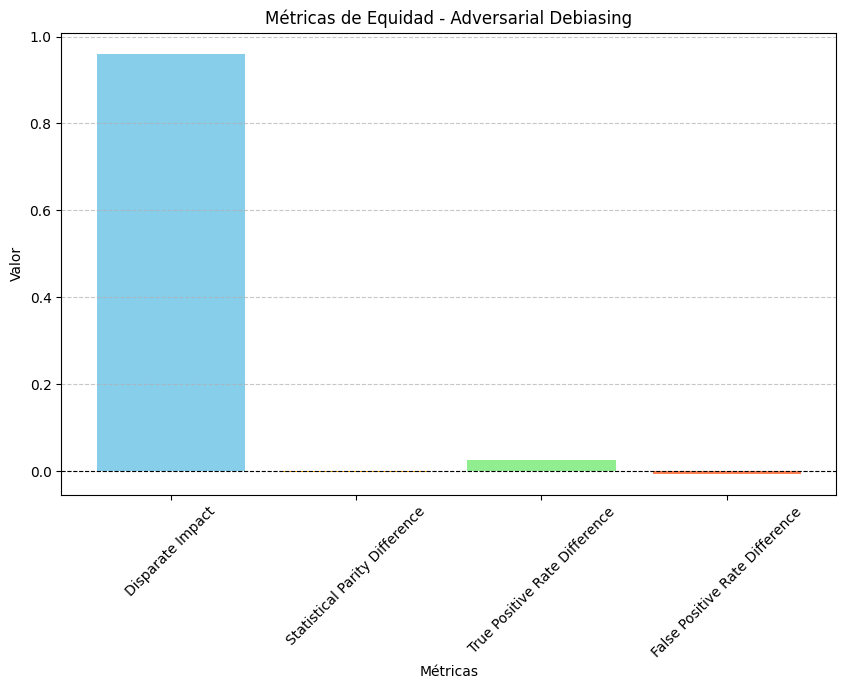

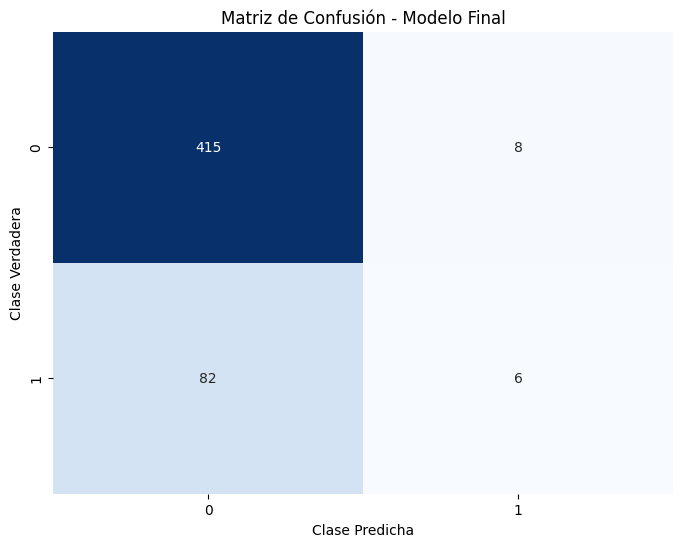

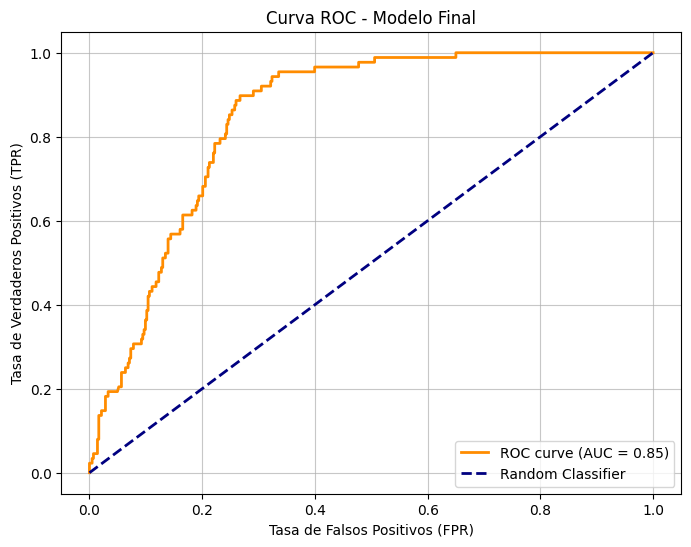

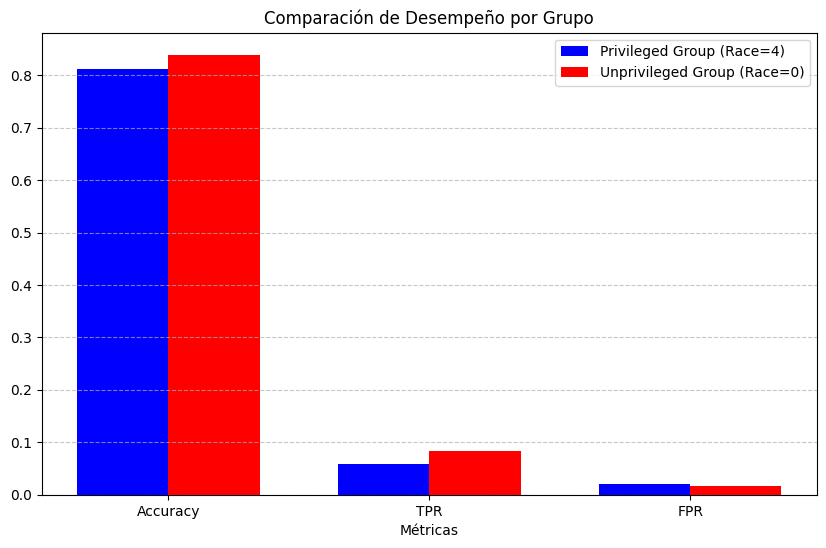


--- Resultados Generales ---
Precisión final: 0.82
AUC-ROC final: 0.85

--- Métricas de Equidad ---
Impacto dispar: 0.96
Diferencia de paridad demográfica: -0.00
True Positive Rate Difference: 0.03
False Positive Rate Difference: -0.01


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report

# Definir la función safe_metric para manejar errores
def safe_metric(metric_func):
    """
    Calcula métricas de manera segura evitando errores por división entre cero.
    Si ocurre un error, devuelve NaN.
    """
    try:
        return metric_func()
    except ZeroDivisionError:
        return np.nan

# Calcular métricas de equidad y de desempeño
disparate_impact = safe_metric(lambda: metric.disparate_impact())
statistical_parity_difference = safe_metric(lambda: metric.statistical_parity_difference())
tpr_difference = safe_metric(lambda: metric.true_positive_rate_difference())
fpr_difference = safe_metric(lambda: metric.false_positive_rate_difference())

# **1. Gráfico de barras para métricas de equidad**
metrics = ["Disparate Impact", "Statistical Parity Difference",
           "True Positive Rate Difference", "False Positive Rate Difference"]
values = [disparate_impact, statistical_parity_difference, tpr_difference, fpr_difference]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=["skyblue", "orange", "lightgreen", "coral"])
plt.title("Métricas de Equidad - Adversarial Debiasing")
plt.ylabel("Valor")
plt.xlabel("Métricas")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea de referencia
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# **2. Matriz de confusión**
conf_matrix_final = confusion_matrix(y_test, test_dataset_pred_post.labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_final, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión - Modelo Final")
plt.ylabel("Clase Verdadera")
plt.xlabel("Clase Predicha")
plt.show()

# **3. Curva ROC**
y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilidades predichas por el modelo base
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Classifier")
plt.title("Curva ROC - Modelo Final")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.7)
plt.show()

# **4. Comparación de métricas por grupo privilegiado y no privilegiado**
privileged_metrics = {
    "Accuracy": metric.accuracy(privileged=True),
    "TPR": metric.true_positive_rate(privileged=True),
    "FPR": metric.false_positive_rate(privileged=True)
}
unprivileged_metrics = {
    "Accuracy": metric.accuracy(privileged=False),
    "TPR": metric.true_positive_rate(privileged=False),
    "FPR": metric.false_positive_rate(privileged=False)
}

x = np.arange(len(privileged_metrics))  # Posición en el eje x
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, privileged_metrics.values(), width, label='Privileged Group (Race=4)', color="blue")
bars2 = ax.bar(x + width/2, unprivileged_metrics.values(), width, label='Unprivileged Group (Race=0)', color="red")

# Etiquetas y formato
ax.set_xlabel('Métricas')
ax.set_title('Comparación de Desempeño por Grupo')
ax.set_xticks(x)
ax.set_xticklabels(privileged_metrics.keys())
ax.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# **5. Resumen de métricas generales y de equidad en texto**
accuracy_final = accuracy_score(y_test, test_dataset_pred_post.labels)
roc_auc_final = roc_auc_score(y_test, y_prob)

print("\n--- Resultados Generales ---")
print(f"Precisión final: {accuracy_final:.2f}")
print(f"AUC-ROC final: {roc_auc_final:.2f}")
print("\n--- Métricas de Equidad ---")
print(f"Impacto dispar: {disparate_impact:.2f}")
print(f"Diferencia de paridad demográfica: {statistical_parity_difference:.2f}")
print(f"True Positive Rate Difference: {tpr_difference:.2f}")
print(f"False Positive Rate Difference: {fpr_difference:.2f}")

